In [1]:
import pandas as pd
from sqlalchemy import create_engine
from tqdm import tqdm
import urllib
from sqlalchemy import text

tqdm.pandas()


import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [2]:
password = "cro-r5sweDlVay5t=eta"
conn_string_odbc="Driver={ODBC Driver 18 for SQL Server};Server=tcp:smartspace.database.windows.net,1433;Database=connectionspace;Uid=stats170-G6;Pwd=cro-r5sweDlVay5t=eta;Encrypt=yes;TrustServerCertificate=no;Connection Timeout=30;"
params = urllib.parse.quote_plus(conn_string_odbc)
conn_str_formatted = 'mssql+pyodbc:///?odbc_connect={}'.format(params)
engine = create_engine(conn_str_formatted)

In [3]:
# fetch table names
conn = engine.connect()

query = text("SELECT * FROM INFORMATION_SCHEMA.TABLES WHERE TABLE_TYPE = 'BASE TABLE'")
result = conn.execute(query)
for row in result:
    print(row)

conn.close()

('connectionspace', 'dbo', 'region_to_space', 'BASE TABLE')
('connectionspace', 'dbo', 'processed_data_merged', 'BASE TABLE')
('connectionspace', 'dbo', 'class_schedule', 'BASE TABLE')
('connectionspace', 'dbo', 'dbh_space', 'BASE TABLE')
('connectionspace', 'dbo', 'processed_data4', 'BASE TABLE')
('connectionspace', 'dbo', 'space_groups', 'BASE TABLE')
('connectionspace', 'dbo', 'region_to_coverage', 'BASE TABLE')
('connectionspace', 'dbo', 'space_hierarchy', 'BASE TABLE')
('connectionspace', 'dbo', 'lctr_result', 'BASE TABLE')
('connectionspace', 'dbo', 'days_of_mac', 'BASE TABLE')
('connectionspace', 'dbo', 'Processed_Data', 'BASE TABLE')
('connectionspace', 'dbo', 'enriched_result', 'BASE TABLE')
('connectionspace', 'dbo', 'sensor', 'BASE TABLE')
('connectionspace', 'dbo', 'space_types', 'BASE TABLE')
('connectionspace', 'dbo', 'processed_data3', 'BASE TABLE')


In [4]:
# fetch lctr_result table
conn = engine.connect()

query = text("SELECT * FROM lctr_result")
results = conn.execute(query)

rows = results.fetchall()
cols = results.keys()
lctr_result = pd.DataFrame(rows, columns=cols)

conn.close()

lctr_result

KeyboardInterrupt: 

In [7]:
# fetch processed_data3 table
conn = engine.connect()

query = text("SELECT * FROM processed_data3")
results = conn.execute(query)

rows = results.fetchall()
cols = results.keys()
df_processed_data3 = pd.DataFrame(rows, columns=cols)

conn.close()

df_processed_data3

macAddress  userId      startTimestamp  \
0        00002dc6243d2a8c5108084ba322634d8255d5df  190150 2018-03-06 19:24:50   
1        00002dc6243d2a8c5108084ba322634d8255d5df  190150 2018-03-06 19:25:06   
2        00002dc6243d2a8c5108084ba322634d8255d5df  190150 2018-03-06 19:25:20   
3        00002dc6243d2a8c5108084ba322634d8255d5df  190150 2018-03-06 19:25:31   
4        00014c815769ff2a99662e77a228abc50f0ab012  174218 2017-11-22 09:16:23   
...                                           ...     ...                 ...   
1797614  22af47897bd51fd4a00fc4886860683dd63bad48  236916 2018-03-19 00:00:00   
1797615  258e22fb74c43539a1eb05ad681e991cbdd6711a  236917 2017-11-30 21:29:31   
1797616  258e22fb74c43539a1eb05ad681e991cbdd6711a  236917 2017-12-01 00:00:00   
1797617  258e22fb74c43539a1eb05ad681e991cbdd6711a  236917 2018-02-04 21:39:48   
1797618  258e22fb74c43539a1eb05ad681e991cbdd6711a  236917 2018-02-05 00:00:00   

               endTimestamp room_location  duration startQuarter endQuarter  \
0       2018-03-06 19:25:06          3039      16.0          w18        w18   
1       2018-03-06 19:25:20          4232      14.0          w18        w18   
2       2018-03-06 19:25:31          5062      11.0          w18        w18   
3       2018-03-06 21:22:57          6011    7046.0          w18        w18   
4       2017-11-22 09:33:47          1407    1044.0          f17        f17   
...                     ...           ...       ...          ...        ...   
1797614 2018-03-19 00:35:09          2208    2109.0          w18        w18   
1797615 2017-11-30 23:59:59          2061    9028.0          f17        f17   
1797616 2017-12-01 01:12:47          2061    4367.0          f17        f17   
1797617 2018-02-04 23:59:59          2061    8411.0          w18        w18   
1797618 2018-02-05 00:01:23          2061      83.0          w18        w18   

        quarter  
0           w18  
1           w18  
2           w18  
3           w18  
4           f17  
...         ...  
1797614     w18  
1797615     f17  
1797616     f17  
1797617     w18  
1797618     w18  

[1797619 rows x 9 columns]

In [8]:
# Check time range to determine quarter and week ranges based on UCI quarterly academic calendar
earliest_start_time = df_processed_data3['startTimestamp'].min()
latest_end_time = df_processed_data3['endTimestamp'].max()

print("Earliest Start Time:", earliest_start_time)
print("Latest End Time:", latest_end_time)

Earliest Start Time: 2017-08-28 16:10:09
Latest End Time: 2019-05-20 12:00:53


In [9]:
# Create a new column for the week number of the year
df_processed_data3['week'] = df_processed_data3['startTimestamp'].dt.isocalendar().week

# Print
df_processed_data3


macAddress  userId      startTimestamp  \
0        00002dc6243d2a8c5108084ba322634d8255d5df  190150 2018-03-06 19:24:50   
1        00002dc6243d2a8c5108084ba322634d8255d5df  190150 2018-03-06 19:25:06   
2        00002dc6243d2a8c5108084ba322634d8255d5df  190150 2018-03-06 19:25:20   
3        00002dc6243d2a8c5108084ba322634d8255d5df  190150 2018-03-06 19:25:31   
4        00014c815769ff2a99662e77a228abc50f0ab012  174218 2017-11-22 09:16:23   
...                                           ...     ...                 ...   
1797614  22af47897bd51fd4a00fc4886860683dd63bad48  236916 2018-03-19 00:00:00   
1797615  258e22fb74c43539a1eb05ad681e991cbdd6711a  236917 2017-11-30 21:29:31   
1797616  258e22fb74c43539a1eb05ad681e991cbdd6711a  236917 2017-12-01 00:00:00   
1797617  258e22fb74c43539a1eb05ad681e991cbdd6711a  236917 2018-02-04 21:39:48   
1797618  258e22fb74c43539a1eb05ad681e991cbdd6711a  236917 2018-02-05 00:00:00   

               endTimestamp room_location  duration startQuarter endQuarter  \
0       2018-03-06 19:25:06          3039      16.0          w18        w18   
1       2018-03-06 19:25:20          4232      14.0          w18        w18   
2       2018-03-06 19:25:31          5062      11.0          w18        w18   
3       2018-03-06 21:22:57          6011    7046.0          w18        w18   
4       2017-11-22 09:33:47          1407    1044.0          f17        f17   
...                     ...           ...       ...          ...        ...   
1797614 2018-03-19 00:35:09          2208    2109.0          w18        w18   
1797615 2017-11-30 23:59:59          2061    9028.0          f17        f17   
1797616 2017-12-01 01:12:47          2061    4367.0          f17        f17   
1797617 2018-02-04 23:59:59          2061    8411.0          w18        w18   
1797618 2018-02-05 00:01:23          2061      83.0          w18        w18   

        quarter  week  
0           w18    10  
1           w18    10  
2           w18    10  
3           w18    10  
4           f17    47  
...         ...   ...  
1797614     w18    12  
1797615     f17    48  
1797616     f17    48  
1797617     w18     5  
1797618     w18     6  

[1797619 rows x 10 columns]

In [10]:
# Each quarter should start at week 0. find earliest time, set as week 0, set following weeks based on that
# Group by startQuarter, find min timestamp for each quarter
quarter_min_timestamps = df_processed_data3.groupby('startQuarter')['startTimestamp'].min()

# Assign week per quarter based on min timestamp
def assign_week_of_quarter(row):
    quarter_start = quarter_min_timestamps[row['startQuarter']]
    return (row['startTimestamp'] - quarter_start).days // 7 + 1

# Create new column week_of_quarter
df_processed_data3['week_of_quarter'] = df_processed_data3.apply(assign_week_of_quarter, axis=1)

# Print
df_processed_data3


macAddress  userId      startTimestamp  \
0        00002dc6243d2a8c5108084ba322634d8255d5df  190150 2018-03-06 19:24:50   
1        00002dc6243d2a8c5108084ba322634d8255d5df  190150 2018-03-06 19:25:06   
2        00002dc6243d2a8c5108084ba322634d8255d5df  190150 2018-03-06 19:25:20   
3        00002dc6243d2a8c5108084ba322634d8255d5df  190150 2018-03-06 19:25:31   
4        00014c815769ff2a99662e77a228abc50f0ab012  174218 2017-11-22 09:16:23   
...                                           ...     ...                 ...   
1797614  22af47897bd51fd4a00fc4886860683dd63bad48  236916 2018-03-19 00:00:00   
1797615  258e22fb74c43539a1eb05ad681e991cbdd6711a  236917 2017-11-30 21:29:31   
1797616  258e22fb74c43539a1eb05ad681e991cbdd6711a  236917 2017-12-01 00:00:00   
1797617  258e22fb74c43539a1eb05ad681e991cbdd6711a  236917 2018-02-04 21:39:48   
1797618  258e22fb74c43539a1eb05ad681e991cbdd6711a  236917 2018-02-05 00:00:00   

               endTimestamp room_location  duration startQuarter endQuarter  \
0       2018-03-06 19:25:06          3039      16.0          w18        w18   
1       2018-03-06 19:25:20          4232      14.0          w18        w18   
2       2018-03-06 19:25:31          5062      11.0          w18        w18   
3       2018-03-06 21:22:57          6011    7046.0          w18        w18   
4       2017-11-22 09:33:47          1407    1044.0          f17        f17   
...                     ...           ...       ...          ...        ...   
1797614 2018-03-19 00:35:09          2208    2109.0          w18        w18   
1797615 2017-11-30 23:59:59          2061    9028.0          f17        f17   
1797616 2017-12-01 01:12:47          2061    4367.0          f17        f17   
1797617 2018-02-04 23:59:59          2061    8411.0          w18        w18   
1797618 2018-02-05 00:01:23          2061      83.0          w18        w18   

        quarter  week  week_of_quarter  
0           w18    10                9  
1           w18    10                9  
2           w18    10                9  
3           w18    10                9  
4           f17    47                9  
...         ...   ...              ...  
1797614     w18    12               11  
1797615     f17    48               10  
1797616     f17    48               10  
1797617     w18     5                5  
1797618     w18     6                5  

[1797619 rows x 11 columns]

In [11]:
# Set 'out' room_locations as 0
df_processed_data3['floor'] = df_processed_data3['room_location'].apply(lambda x: 0 if x == 'out' else int(x[0]))
df_processed_data3

macAddress  userId      startTimestamp  \
0        00002dc6243d2a8c5108084ba322634d8255d5df  190150 2018-03-06 19:24:50   
1        00002dc6243d2a8c5108084ba322634d8255d5df  190150 2018-03-06 19:25:06   
2        00002dc6243d2a8c5108084ba322634d8255d5df  190150 2018-03-06 19:25:20   
3        00002dc6243d2a8c5108084ba322634d8255d5df  190150 2018-03-06 19:25:31   
4        00014c815769ff2a99662e77a228abc50f0ab012  174218 2017-11-22 09:16:23   
...                                           ...     ...                 ...   
1797614  22af47897bd51fd4a00fc4886860683dd63bad48  236916 2018-03-19 00:00:00   
1797615  258e22fb74c43539a1eb05ad681e991cbdd6711a  236917 2017-11-30 21:29:31   
1797616  258e22fb74c43539a1eb05ad681e991cbdd6711a  236917 2017-12-01 00:00:00   
1797617  258e22fb74c43539a1eb05ad681e991cbdd6711a  236917 2018-02-04 21:39:48   
1797618  258e22fb74c43539a1eb05ad681e991cbdd6711a  236917 2018-02-05 00:00:00   

               endTimestamp room_location  duration startQuarter endQuarter  \
0       2018-03-06 19:25:06          3039      16.0          w18        w18   
1       2018-03-06 19:25:20          4232      14.0          w18        w18   
2       2018-03-06 19:25:31          5062      11.0          w18        w18   
3       2018-03-06 21:22:57          6011    7046.0          w18        w18   
4       2017-11-22 09:33:47          1407    1044.0          f17        f17   
...                     ...           ...       ...          ...        ...   
1797614 2018-03-19 00:35:09          2208    2109.0          w18        w18   
1797615 2017-11-30 23:59:59          2061    9028.0          f17        f17   
1797616 2017-12-01 01:12:47          2061    4367.0          f17        f17   
1797617 2018-02-04 23:59:59          2061    8411.0          w18        w18   
1797618 2018-02-05 00:01:23          2061      83.0          w18        w18   

        quarter  week  week_of_quarter  floor  
0           w18    10                9      3  
1           w18    10                9      4  
2           w18    10                9      5  
3           w18    10                9      6  
4           f17    47                9      1  
...         ...   ...              ...    ...  
1797614     w18    12               11      2  
1797615     f17    48               10      2  
1797616     f17    48               10      2  
1797617     w18     5                5      2  
1797618     w18     6                5      2  

[1797619 rows x 12 columns]

Models

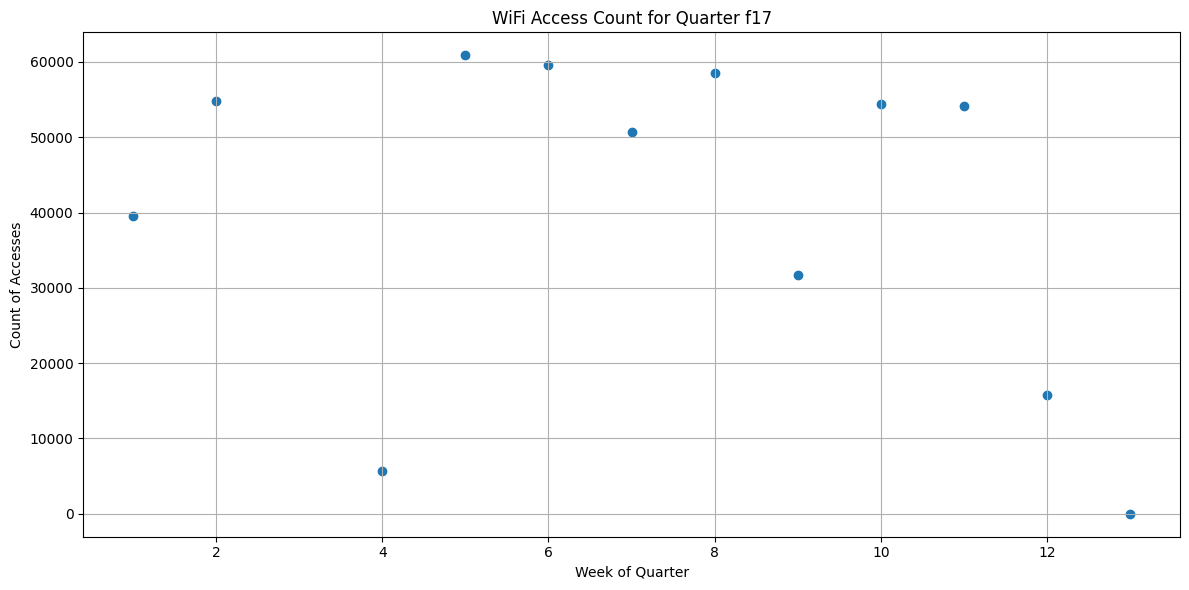

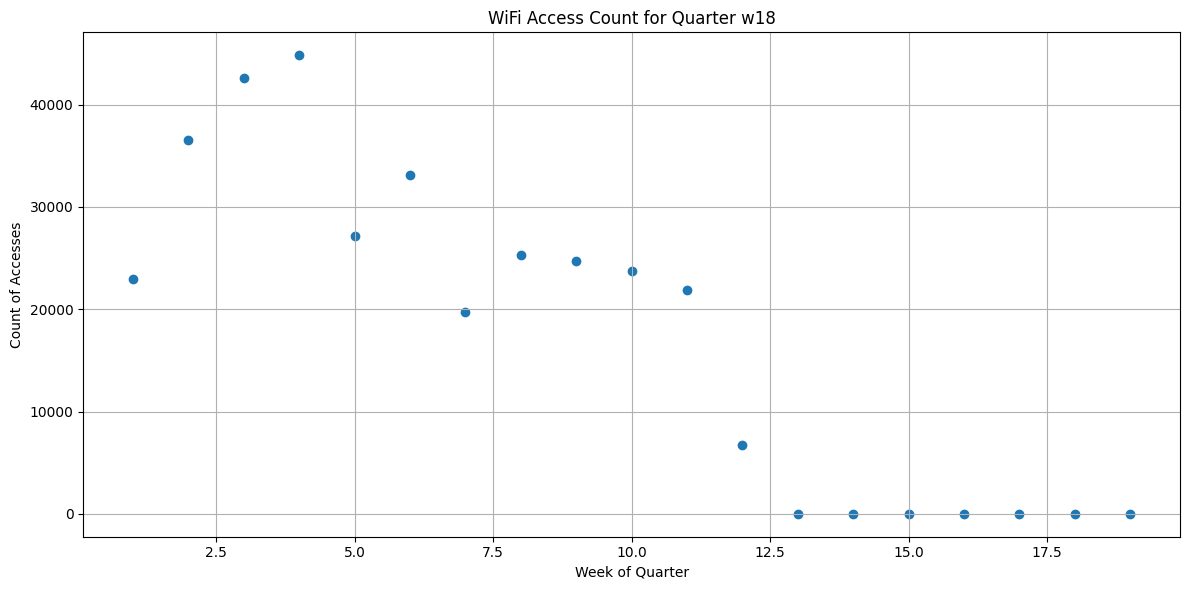

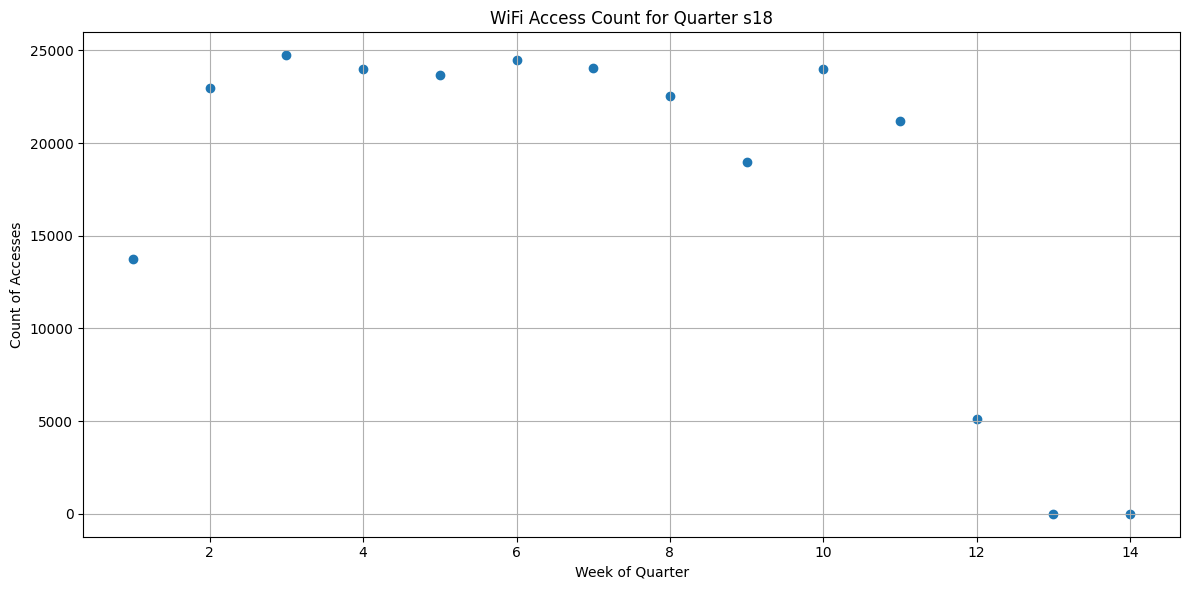

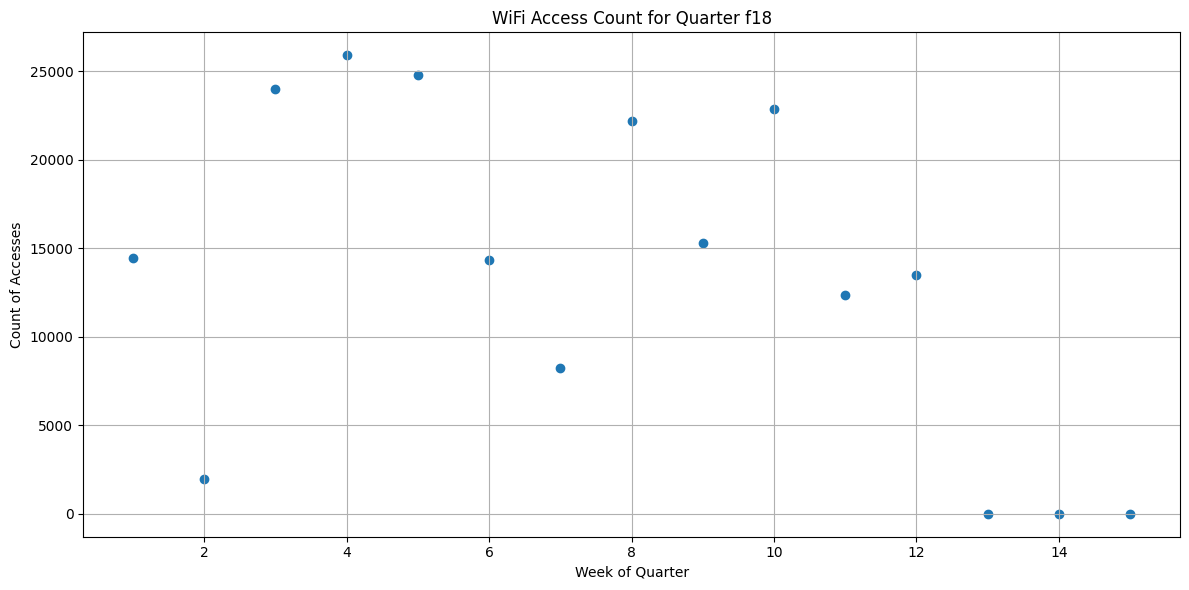

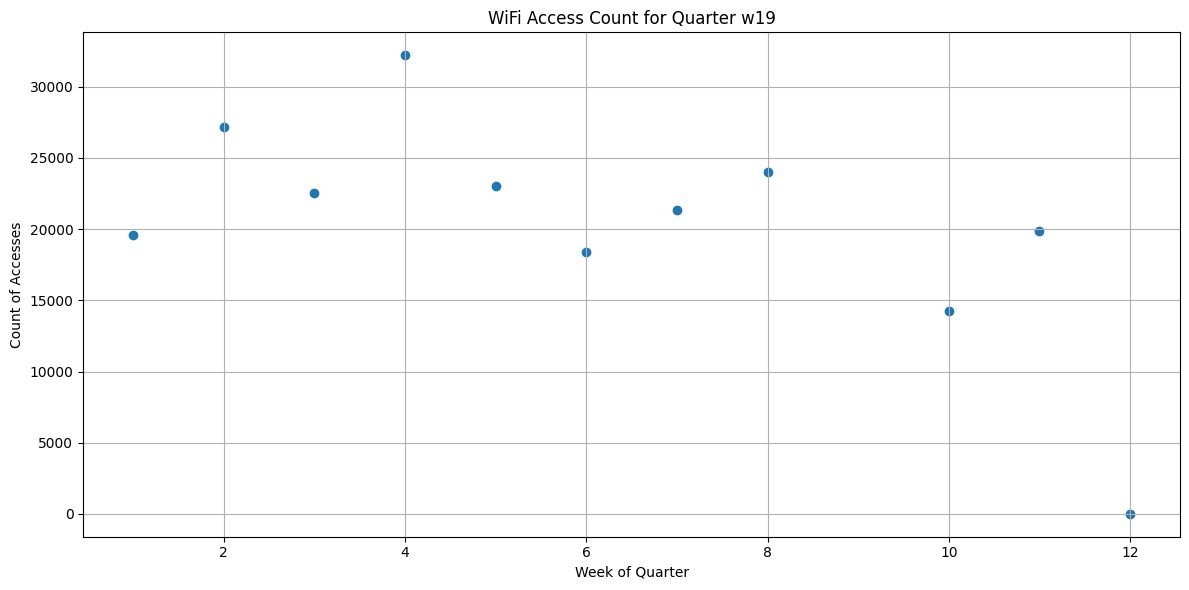

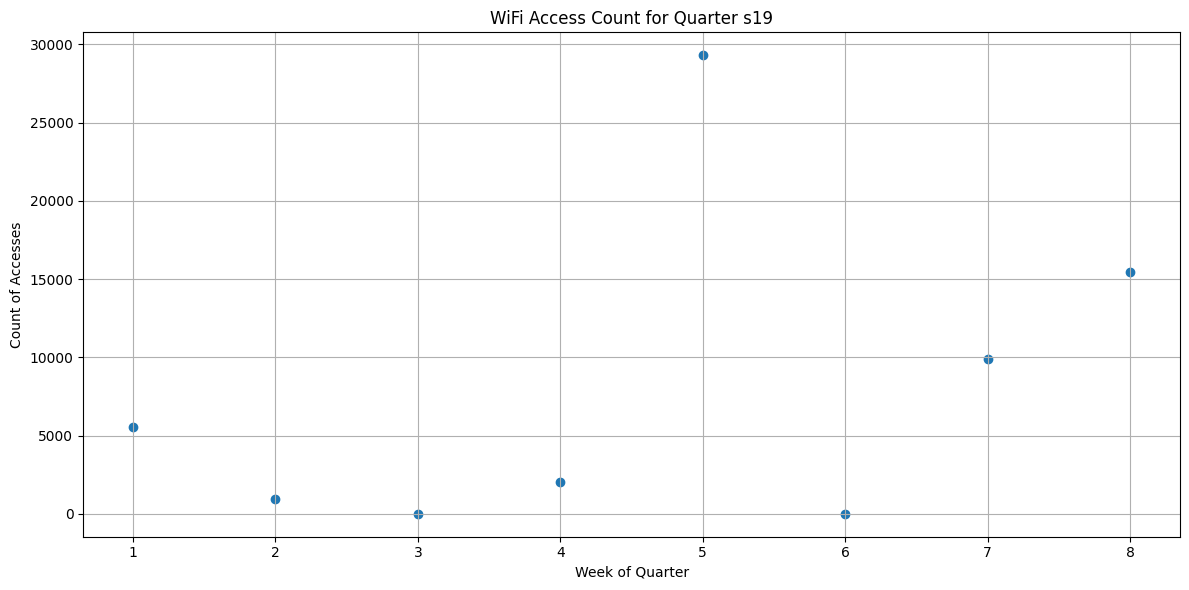

In [12]:


# Filter data for each quarter separately
quarters_to_plot = ['f17', 'w18', 's18', 'f18', 'w19', 's19']

# Set up scatter plots for each quarter for initial trend analysis
for quarter in quarters_to_plot:
    quarter_data = df_processed_data3[df_processed_data3['startQuarter'] == quarter]
    quarterly_counts = quarter_data.groupby('week_of_quarter').size().reset_index(name='count')
    
    plt.figure(figsize=(12, 6))
    plt.scatter(quarterly_counts['week_of_quarter'], quarterly_counts['count'])
    plt.title(f'WiFi Access Count for Quarter {quarter}')
    plt.xlabel('Week of Quarter')
    plt.ylabel('Count of Accesses')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


-- FB Prophet model attempt

c:\Users\lavin\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
02:21:11 - cmdstanpy - INFO - Chain [1] start processing
02:21:11 - cmdstanpy - INFO - Chain [1] done processing


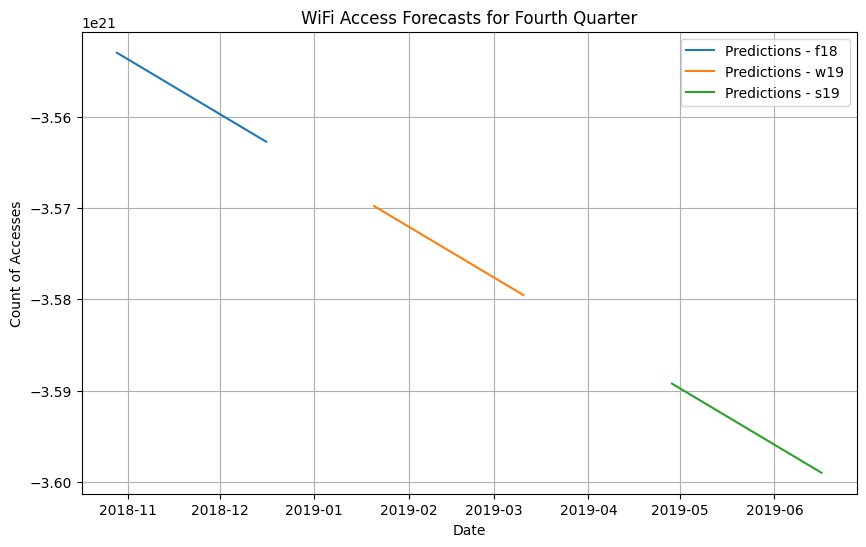

In [13]:
from prophet import Prophet

# Filter for first three quarters as training set
train_data = df_processed_data3[df_processed_data3['startQuarter'].isin(['f17', 'w18', 's18'])]

train_data = train_data.groupby(['startQuarter', 'week_of_quarter']).size().reset_index(name='count')
# Rename columns to 'ds' for time series data and 'y' for target variable
train_data = train_data.rename(columns={'week_of_quarter': 'ds', 'count': 'y'})  
train_data['ds'] = pd.to_datetime(train_data['ds'])  

model = Prophet()
model.fit(train_data)

# Make future predictions for each quarter in the fourth quarter
quarters_to_predict = ['f18', 'w19', 's19']
predictions = []

for quarter in quarters_to_predict:
    test_data = df_processed_data3[df_processed_data3['startQuarter'] == quarter].head(2)  
    test_future = pd.DataFrame({'ds': pd.date_range(start=test_data['startTimestamp'].min(), periods=8, freq='W')})
    forecast = model.predict(test_future)
    predictions.append(forecast)

# Plot 
plt.figure(figsize=(10, 6))

for i, quarter in enumerate(quarters_to_predict):
    plt.plot(predictions[i]['ds'], predictions[i]['yhat'], label=f'Predictions - {quarter}', color=f'C{i}', marker='', linestyle='-')

plt.title('WiFi Access Forecasts for Fourth Quarter')
plt.xlabel('Date')
plt.ylabel('Count of Accesses')
plt.legend()
plt.grid(True)
plt.show()


-- SARIMA Model, should catch time and seasonal trends better than random forests attempt

Trained on other quarters, predict on f18 quarter

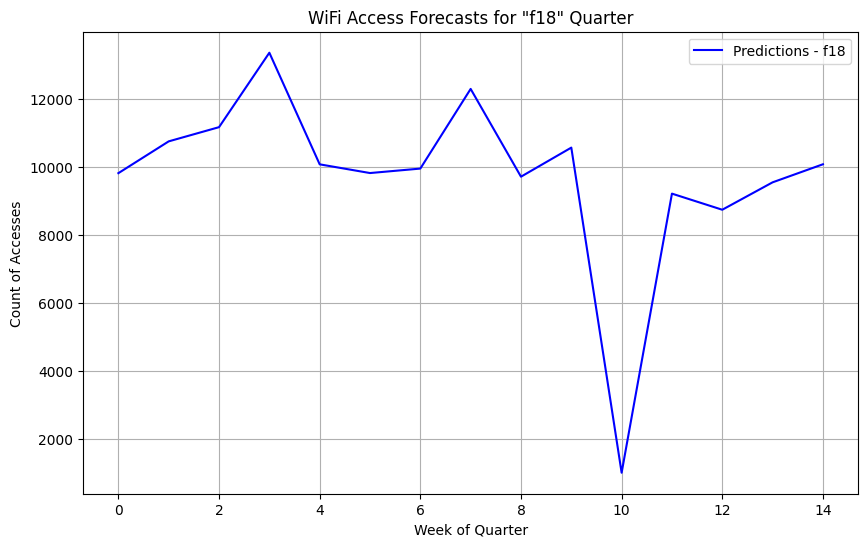

In [14]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Training set 
train_data = df_processed_data3.groupby(['startQuarter', 'week_of_quarter']).size().reset_index(name='count')
train_data = train_data.rename(columns={'week_of_quarter': 'ds', 'count': 'y'})  # Rename columns to 'ds' for time series data and 'y' for target variable

# Define SARIMA model parameters
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)  # Assuming quarterly seasonality


model = SARIMAX(train_data['y'], order=order, seasonal_order=seasonal_order)
model_fit = model.fit(disp=False)

# Predict on f18
quarter_to_predict = 'f18'
test_data = df_processed_data3[df_processed_data3['startQuarter'] == quarter_to_predict]
test_data = test_data.groupby('week_of_quarter').size().reset_index(name='count')

forecast = model_fit.forecast(steps=len(test_data))


plt.figure(figsize=(10, 6))
plt.plot(test_data.index, forecast, label=f'Predictions - {quarter_to_predict}', color='blue', marker='', linestyle='-')

plt.title('WiFi Access Forecasts for "f18" Quarter')
plt.xlabel('Week of Quarter')
plt.ylabel('Count of Accesses')
plt.legend()
plt.grid(True)
plt.show()


In [15]:
import numpy as np
train_data = df_processed_data3[df_processed_data3['startQuarter'] != 'f18']
validation_data = df_processed_data3[df_processed_data3['startQuarter'] == 'f18']

train_data = train_data.groupby(['startQuarter', 'week_of_quarter']).size().reset_index(name='count')
train_data = train_data.rename(columns={'week_of_quarter': 'ds', 'count': 'y'})

model = SARIMAX(train_data['y'], order=order, seasonal_order=seasonal_order)
model_fit = model.fit(disp=False)

test_data = validation_data.groupby('week_of_quarter').size().reset_index(name='count')
forecast = model_fit.forecast(steps=len(test_data))


mae = mean_absolute_error(test_data['count'], forecast)
mse = mean_squared_error(test_data['count'], forecast)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')


Mean Absolute Error (MAE): 9495.060091759233
Mean Squared Error (MSE): 108474925.58395675
Root Mean Squared Error (RMSE): 10415.129647966785


In [16]:
# Calculate mean for actual observed values
mean_actual = test_data['count'].mean()

# Errors as a percentage of mean
mae_percentage = (mae / mean_actual) * 100
rmse_percentage = (rmse / mean_actual) * 100

print(f'Mean Absolute Error (MAE) as percentage of mean: {mae_percentage:.2f}%')
print(f'Root Mean Squared Error (RMSE) as percentage of mean: {rmse_percentage:.2f}%')


Mean Absolute Error (MAE) as percentage of mean: 71.20%
Root Mean Squared Error (RMSE) as percentage of mean: 78.10%


-- Validation comparison with f18 quarter

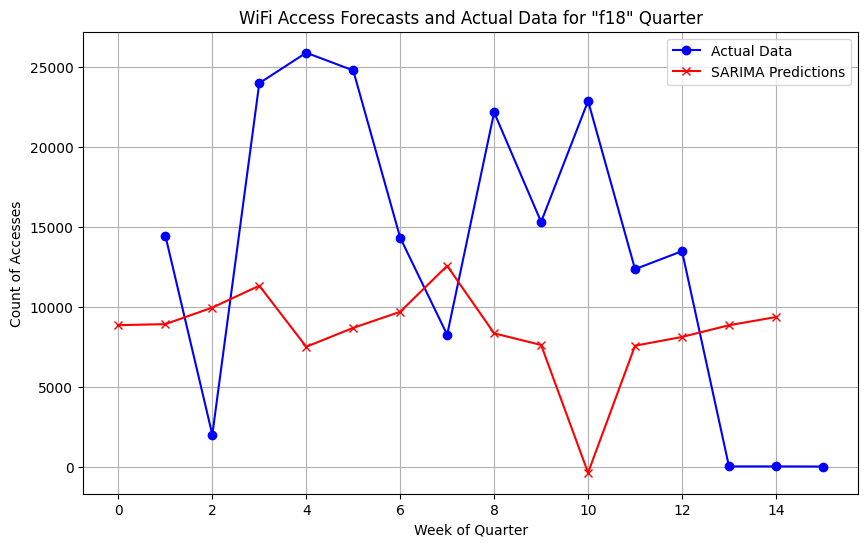

In [17]:
# Filter actual data for the 'f18' quarter
actual_data_f18 = df_processed_data3[df_processed_data3['startQuarter'] == 'f18']
actual_data_f18 = actual_data_f18.groupby('week_of_quarter').size().reset_index(name='count')

plt.figure(figsize=(10, 6))
plt.plot(actual_data_f18['week_of_quarter'], actual_data_f18['count'], label='Actual Data', color='blue', marker='o')
plt.plot(test_data.index, forecast, label='SARIMA Predictions', color='red', marker='x')

plt.title('WiFi Access Forecasts and Actual Data for "f18" Quarter')
plt.xlabel('Week of Quarter')
plt.ylabel('Count of Accesses')
plt.legend()
plt.grid(True)
plt.show()


# Non-Seasonal Part (order = (p, d, q))

p (autoregressive order) = 1:

Why 1?: Setting p = 1 means the model uses one lag of the dependent variable (the variable you're forecasting) as a predictor. This choice implies that the value at time t depends linearly on the value at time t-1.
Interpretation: For example, if you are predicting the number of WiFi accesses this week, the model will use the number of WiFi accesses last week as a predictor.


- d (differencing order) = 1:

Why 1?: Setting d = 1 means the model differences the data once to make it stationary. Differencing removes trends in the data, making it easier to model.
Interpretation: If the data shows an overall increasing trend, differencing will transform the data to remove this trend, making it stationary around a constant mean.


- q (moving average order) = 1:

Why 1?: Setting q = 1 means the model uses one lag of the forecast error as a predictor. This choice implies that the value at time t depends on the forecast error from time t-1.
Interpretation: If there was a large error in last week's forecast, the model will adjust this week’s forecast to compensate.


# Seasonal Part (seasonal_order = (P, D, Q, s))

- P (seasonal autoregressive order) = 1:

Why 1?: Setting P = 1 means the model includes one seasonal lag of the dependent variable. This choice implies that the value at time t depends on the value from the same season in the previous period.
Interpretation: If you are predicting WiFi accesses in week 5 of a quarter, the model will use the accesses from week 5 of the previous quarter as a predictor.


- D (seasonal differencing order) = 1:

Why 1?: Setting D = 1 means the model differences the data once at the seasonal frequency to remove seasonal trends.
Interpretation: If there is a quarterly seasonal pattern, differencing will remove this pattern, making the data stationary around a constant seasonal mean.


- Q (seasonal moving average order) = 1:

Why 1?: Setting Q = 1 means the model uses one seasonal lag of the forecast error as a predictor.
Interpretation: If there was a large forecast error in the same season of the last period, the model will adjust the current forecast to compensate.


- s (seasonal period) = 12:

Why 12?: Setting s = 12 means the seasonal period is 12. This choice implies that the data has a seasonal pattern repeating every 12 units (e.g., months in a year).
Interpretation: If you are working with weekly data and there is an annual seasonal pattern, s = 52 would be appropriate. However, if your data exhibits a monthly pattern within quarters, s = 12 might be chosen to capture this intra-quarterly seasonality.

# Summary
p = 1: Uses one lag of the dependent variable to account for immediate past values.
d = 1: Differences the data once to remove trends and achieve stationarity.
q = 1: Uses one lag of the forecast error to adjust the model based on past forecast inaccuracies.
P = 1: Uses one seasonal lag of the dependent variable to capture seasonal effects.
D = 1: Differences the data once at the seasonal frequency to remove seasonal trends.
Q = 1: Uses one seasonal lag of the forecast error to adjust for seasonal forecast inaccuracies.
s = 12: Assumes a seasonal pattern that repeats every 12 periods (e.g., monthly pattern within quarters).

# Notes: 
- d=1 is useful if there is a changing trend, say increasing trend of users that access dbh as years pass. this will help keep the trends consistent for comparison and prediction.

- If the model predicts 1000 accesses for a given week, on average, we can expect the actual number of accesses to be off by approximately 423 accesses (42.30% of 1000). In other words, the model's predictions might deviate from the actual values by around 423 accesses.

- RMSE accounts for outliers more heavily than MAE as an error metric, which means MAE could be more applicable to our user count per week.

-type of input
each attribute, code for enrichment besides the basic input, which leads to the analysis
if using 2020+ years

step by step

increase highlight of outline

-- Model trains and predicts solely on floor 2 and validate

Mean Absolute Error (MAE): 2720.5887059079155
Mean Squared Error (MSE): 8999557.884176893
Root Mean Squared Error (RMSE): 2999.926313124523
Mean Absolute Error (MAE) as percentage of mean: 40.96%
Root Mean Squared Error (RMSE) as percentage of mean: 45.17%


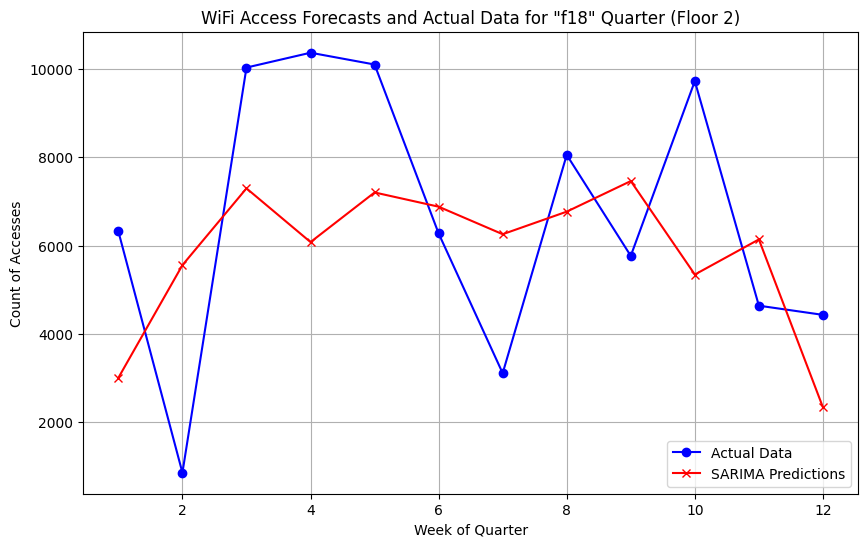

In [18]:
# Isolate floor 2
df_floor_2 = df_processed_data3[df_processed_data3['floor'] == 2]
train_data = df_floor_2[df_floor_2['startQuarter'] != 'f18']
validation_data = df_floor_2[df_floor_2['startQuarter'] == 'f18']

train_data = train_data.groupby(['startQuarter', 'week_of_quarter']).size().reset_index(name='count')
train_data = train_data.rename(columns={'week_of_quarter': 'ds', 'count': 'y'})

order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)  

model = SARIMAX(train_data['y'], order=order, seasonal_order=seasonal_order)
model_fit = model.fit(disp=False)

test_data = validation_data.groupby('week_of_quarter').size().reset_index(name='count')
forecast = model_fit.forecast(steps=len(test_data))

# Calculate errors
mae = mean_absolute_error(test_data['count'], forecast)
mse = mean_squared_error(test_data['count'], forecast)
rmse = np.sqrt(mse)
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

mean_actual = test_data['count'].mean()
mae_percentage = (mae / mean_actual) * 100
rmse_percentage = (rmse / mean_actual) * 100
print(f'Mean Absolute Error (MAE) as percentage of mean: {mae_percentage:.2f}%')
print(f'Root Mean Squared Error (RMSE) as percentage of mean: {rmse_percentage:.2f}%')

plt.figure(figsize=(10, 6))
plt.plot(test_data['week_of_quarter'], test_data['count'], label='Actual Data', color='blue', marker='o')
plt.plot(test_data['week_of_quarter'], forecast, label='SARIMA Predictions', color='red', marker='x')

plt.title('WiFi Access Forecasts and Actual Data for "f18" Quarter (Floor 2)')
plt.xlabel('Week of Quarter')
plt.ylabel('Count of Accesses')
plt.legend()
plt.grid(True)
plt.show()


-- Convert model to a function that takes in the processed data and quarter to predict on, add first 3 weeks to predict

In [19]:
def predict_quarter(df, quarter_to_predict, floor=2, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)):
    # Filter to only include inputted floor
    df_floor = df[df['floor'] == floor]
    
    # Training: Include all quarters except predicted quarter
    initial_training_data = df_floor[df_floor['startQuarter'] != quarter_to_predict]
    initial_training_data = initial_training_data.groupby(['startQuarter', 'week_of_quarter']).size().reset_index(name='count')
    
    # Also train on first 3 weeks of predicted quarter
    additional_training_data = df_floor[(df_floor['startQuarter'] == quarter_to_predict) & (df_floor['week_of_quarter'] <= 2)]
    additional_training_data = additional_training_data.groupby(['startQuarter', 'week_of_quarter']).size().reset_index(name='count')
    
    # Add to training
    combined_training_data = pd.concat([initial_training_data, additional_training_data])
    combined_training_data = combined_training_data.rename(columns={'week_of_quarter': 'ds', 'count': 'y'})
    
    model = SARIMAX(combined_training_data['y'], order=order, seasonal_order=seasonal_order)
    model_fit = model.fit(disp=False)
    
    # Validation for all weeks excluding first 2 weeks of predicted quarter
    test_data = df_floor[(df_floor['startQuarter'] == quarter_to_predict) & (df_floor['week_of_quarter'] > 2)]
    test_data = test_data.groupby('week_of_quarter').size().reset_index(name='count')
    
    forecast = model_fit.forecast(steps=len(test_data))
    
    # Errors
    mae = mean_absolute_error(test_data['count'], forecast)
    mse = mean_squared_error(test_data['count'], forecast)
    rmse = np.sqrt(mse)
    
    print(f'Quarter: {quarter_to_predict}')
    print(f'Mean Absolute Error (MAE): {mae}')
    print(f'Mean Squared Error (MSE): {mse}')
    print(f'Root Mean Squared Error (RMSE): {rmse}')
    
    mean_actual = test_data['count'].mean()
    mae_percentage = (mae / mean_actual) * 100
    rmse_percentage = (rmse / mean_actual) * 100
    
    print(f'Mean Absolute Error (MAE) as percentage of mean: {mae_percentage:.2f}%')
    print(f'Root Mean Squared Error (RMSE) as percentage of mean: {rmse_percentage:.2f}%')
    
    plt.figure(figsize=(10, 6))
    plt.plot(test_data['week_of_quarter'], test_data['count'], label='Actual Data', color='blue', marker='o')
    plt.plot(test_data['week_of_quarter'], forecast, label='SARIMA Predictions', color='red', marker='x')
    
    plt.title(f'WiFi Access Forecasts and Actual Data for "{quarter_to_predict}" Quarter (Floor {floor})')
    plt.xlabel('Week of Quarter')
    plt.ylabel('Count of Accesses')
    plt.legend()
    plt.grid(True)
    plt.show()

c:\Users\lavin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\lavin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\lavin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lavin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users

Quarter: w19
Mean Absolute Error (MAE): 1857.0176425875284
Mean Squared Error (MSE): 4907393.261605056
Root Mean Squared Error (RMSE): 2215.263700240912
Mean Absolute Error (MAE) as percentage of mean: 22.55%
Root Mean Squared Error (RMSE) as percentage of mean: 26.90%


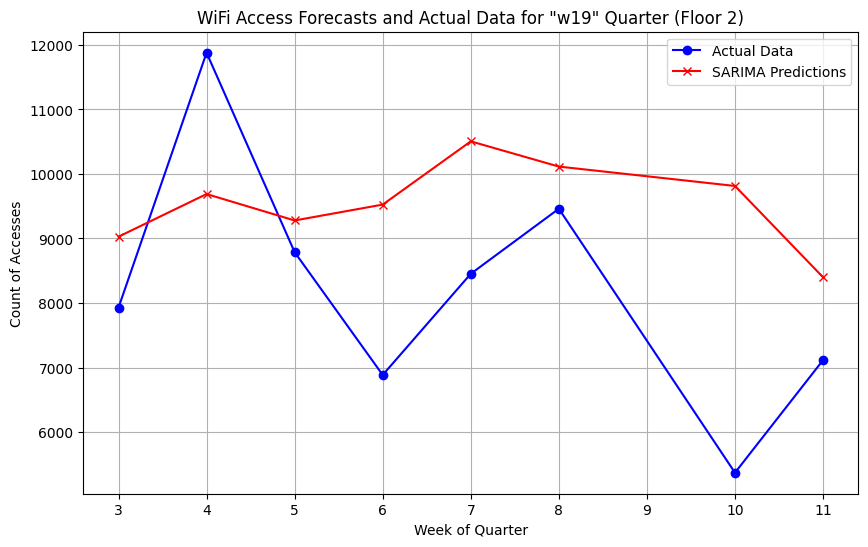

In [20]:
predict_quarter(df_processed_data3, 'w19')

-- Try to normalize counts to get trends first when predicting

In [21]:
def predict_quarter_proportion(df, quarter_to_predict, floor=2, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)):
    df_floor = df[df['floor'] == floor]
    
    # Get max count per quarter
    max_counts = df_floor.groupby('startQuarter')['week_of_quarter'].size().reset_index(name='max_count')
    
    initial_training_data = df_floor[df_floor['startQuarter'] != quarter_to_predict]
    initial_training_data = initial_training_data.groupby(['startQuarter', 'week_of_quarter']).size().reset_index(name='count')
    initial_training_data = initial_training_data.merge(max_counts, on='startQuarter')
    
    # Normalize counts by max count per quarter
    initial_training_data['count_normalized'] = initial_training_data['count'] / initial_training_data['max_count']
    
    # First 3 weeks too for training
    additional_training_data = df_floor[(df_floor['startQuarter'] == quarter_to_predict) & (df_floor['week_of_quarter'] <= 2)]
    additional_training_data = additional_training_data.groupby(['startQuarter', 'week_of_quarter']).size().reset_index(name='count')
    additional_training_data = additional_training_data.merge(max_counts, on='startQuarter')
    additional_training_data['count_normalized'] = additional_training_data['count'] / additional_training_data['max_count']
    
    # Combine other quarters + first 3 weeks
    combined_training_data = pd.concat([initial_training_data, additional_training_data])
    combined_training_data = combined_training_data.rename(columns={'week_of_quarter': 'ds', 'count_normalized': 'y'})
    
    # Model
    model = SARIMAX(combined_training_data['y'], order=order, seasonal_order=seasonal_order)
    model_fit = model.fit(disp=False)
    
    # Validation
    test_data = df_floor[(df_floor['startQuarter'] == quarter_to_predict) & (df_floor['week_of_quarter'] > 2)]
    test_data = test_data.groupby('week_of_quarter').size().reset_index(name='count')
    
    max_count = max_counts[max_counts['startQuarter'] == quarter_to_predict]['max_count'].values[0]
    
    # Predict
    forecast_normalized = model_fit.forecast(steps=len(test_data))
    # Denormalize values to calculate errors
    forecast = forecast_normalized * max_count
    
    # Error
    mae = mean_absolute_error(test_data['count'], forecast)
    mse = mean_squared_error(test_data['count'], forecast)
    rmse = np.sqrt(mse)
    
    print(f'Quarter: {quarter_to_predict}')
    print(f'Mean Absolute Error (MAE): {mae}')
    print(f'Mean Squared Error (MSE): {mse}')
    print(f'Root Mean Squared Error (RMSE): {rmse}')
    
    mean_actual = test_data['count'].mean()
    mae_percentage = (mae / mean_actual) * 100
    rmse_percentage = (rmse / mean_actual) * 100
    
    print(f'Mean Absolute Error (MAE) as percentage of mean: {mae_percentage:.2f}%')
    print(f'Root Mean Squared Error (RMSE) as percentage of mean: {rmse_percentage:.2f}%')
    
    plt.figure(figsize=(10, 6))
    plt.plot(test_data['week_of_quarter'], test_data['count'], label='Actual Data', color='blue', marker='o')
    plt.plot(test_data['week_of_quarter'], forecast, label='SARIMA Predictions', color='red', marker='x')
    
    plt.title(f'WiFi Access Forecasts and Actual Data for "{quarter_to_predict}" Quarter (Floor {floor})')
    plt.xlabel('Week of Quarter')
    plt.ylabel('Count of Accesses')
    plt.legend()
    plt.grid(True)
    plt.show()

c:\Users\lavin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\lavin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\lavin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\lavin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA para

Quarter: w19
Mean Absolute Error (MAE): 8137.5665067213395
Mean Squared Error (MSE): 85928275.05617073
Root Mean Squared Error (RMSE): 9269.750539047463
Mean Absolute Error (MAE) as percentage of mean: 98.82%
Root Mean Squared Error (RMSE) as percentage of mean: 112.57%


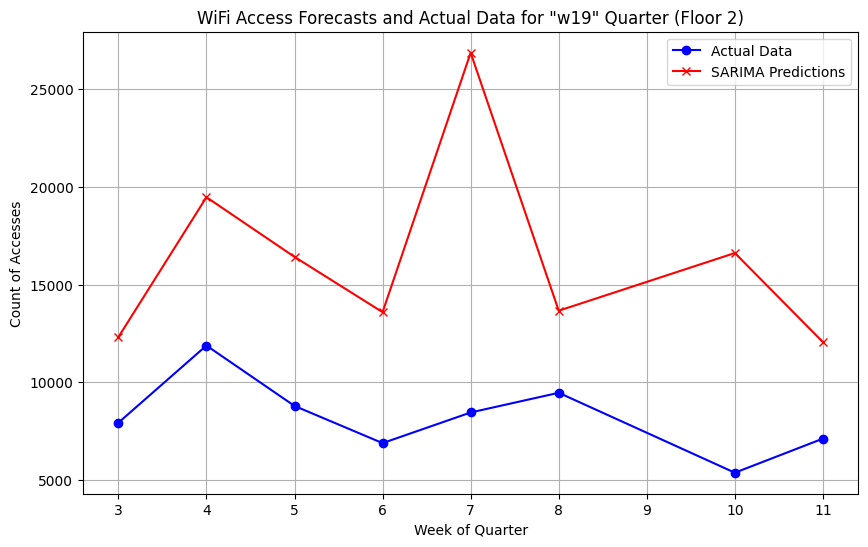

In [22]:
predict_quarter_proportion(df_processed_data3, 'w19')

-- Normalized from counts to percentage of total counts to compare proportions

Train on all other quarters

In [23]:
def normalize_counts(df):
    """ Each quarter becomes a percentage of maximum count in a week for that quarter """
    max_counts = df.groupby('startQuarter')['count'].transform('max')
    df['count_normalized'] = df['count'] / max_counts
    return df

def predict_quarter2(df, quarter_to_predict, floor=2, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)):
    df_floor = df[df['floor'] == floor]
    
    df_floor = df_floor.groupby(['startQuarter', 'week_of_quarter']).size().reset_index(name='count')
    # Normalize counts
    df_floor = normalize_counts(df_floor)
    
    train_data = df_floor[df_floor['startQuarter'] != quarter_to_predict]
    validation_data = df_floor[df_floor['startQuarter'] == quarter_to_predict]
    additional_train_data = validation_data[validation_data['week_of_quarter'] <= 2]
    combined_train_data = pd.concat([train_data, additional_train_data])
    combined_train_data = combined_train_data.rename(columns={'week_of_quarter': 'ds', 'count_normalized': 'y'})
    
    model = SARIMAX(combined_train_data['y'], order=order, seasonal_order=seasonal_order)
    model_fit = model.fit(disp=False)
    
    test_data = validation_data[validation_data['week_of_quarter'] > 2]

    forecast_normalized = model_fit.forecast(steps=len(test_data))
    
    # Update error calculation to not need forecast denormalizing
    mae = mean_absolute_error(test_data['count_normalized'], forecast_normalized)
    mse = mean_squared_error(test_data['count_normalized'], forecast_normalized)
    rmse = np.sqrt(mse)
    
    print(f'Quarter: {quarter_to_predict}')
    print(f'Mean Absolute Error (MAE): {mae}')
    print(f'Mean Squared Error (MSE): {mse}')
    print(f'Root Mean Squared Error (RMSE): {rmse}')
    
    mean_actual = test_data['count_normalized'].mean()
    mae_percentage = (mae / mean_actual) * 100
    rmse_percentage = (rmse / mean_actual) * 100
    
    print(f'Mean Absolute Error (MAE) as percentage of mean: {mae_percentage:.2f}%')
    print(f'Root Mean Squared Error (RMSE) as percentage of mean: {rmse_percentage:.2f}%')
    
    plt.figure(figsize=(10, 6))
    plt.plot(test_data['week_of_quarter'], test_data['count_normalized'], label='Actual Data (Normalized)', color='blue', marker='o')
    plt.plot(test_data['week_of_quarter'], forecast_normalized, label='SARIMA Predictions (Normalized)', color='red', marker='x')
    
    plt.title(f'WiFi Access Forecasts and Actual Data for "{quarter_to_predict}" Quarter (Floor {floor})')
    plt.xlabel('Week of Quarter')
    plt.ylabel('Normalized Count of Accesses')
    plt.legend()
    plt.grid(True)
    plt.show()

# Print quarter names in data
train_quarters = train_data['startQuarter'].unique()
print(f'Training quarters: {train_quarters}')
validation_quarters = validation_data['startQuarter'].unique()
print(f'Validation quarter: {validation_quarters}')


Training quarters: ['f17' 'f17_break' 'f18_break' 's18' 's18_break' 's19' 'summer17'
 'summer17_break' 'summer18' 'summer18_break' 'w18' 'w18_break' 'w19'
 'w19_break']
Validation quarter: ['f18']


c:\Users\lavin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\lavin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\lavin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\lavin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an excepti

Quarter: f18
Mean Absolute Error (MAE): 0.2816924946407475
Mean Squared Error (MSE): 0.09504123830432057
Root Mean Squared Error (RMSE): 0.30828759025351726
Mean Absolute Error (MAE) as percentage of mean: 40.28%
Root Mean Squared Error (RMSE) as percentage of mean: 44.08%


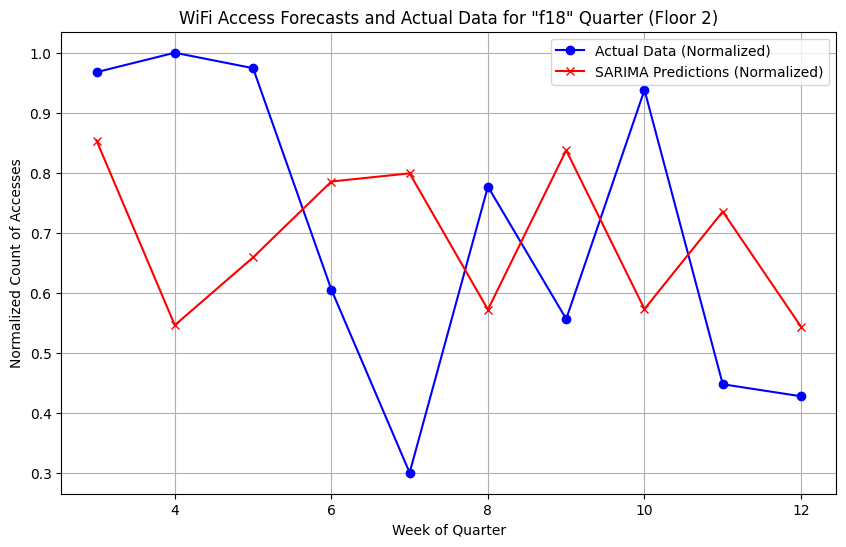

In [24]:
predict_quarter2(df_processed_data3, 'f18')

-- predict function now takes in train_quarters set as input

-- Run all the quarters

Training quarters: ['f17_break', 'f18', 'f18_break', 's18', 's18_break', 's19', 'summer17', 'summer17_break', 'summer18_break', 'w18', 'w18_break', 'w19', 'w19_break']
Validation quarter: ['f17']


c:\Users\lavin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\lavin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\lavin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\lavin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an excepti

Quarter: f17
Mean Absolute Error (MAE): 0.29781793975947324
Mean Squared Error (MSE): 0.14904887745697712
Root Mean Squared Error (RMSE): 0.38606848803933363
Mean Absolute Error (MAE) as percentage of mean: 42.30%
Root Mean Squared Error (RMSE) as percentage of mean: 54.84%


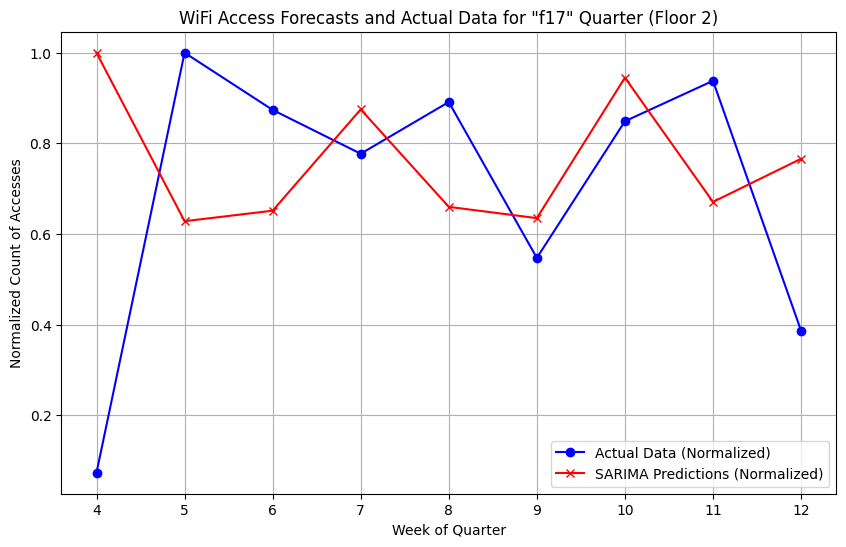

Training quarters: ['f17', 'f17_break', 'f18_break', 's18', 's18_break', 's19', 'summer17', 'summer17_break', 'summer18_break', 'w18', 'w18_break', 'w19', 'w19_break']
Validation quarter: ['f18']


c:\Users\lavin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\lavin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\lavin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\lavin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an excepti

Quarter: f18
Mean Absolute Error (MAE): 0.27391261023759284
Mean Squared Error (MSE): 0.1006199379925983
Root Mean Squared Error (RMSE): 0.3172064595694708
Mean Absolute Error (MAE) as percentage of mean: 39.17%
Root Mean Squared Error (RMSE) as percentage of mean: 45.36%


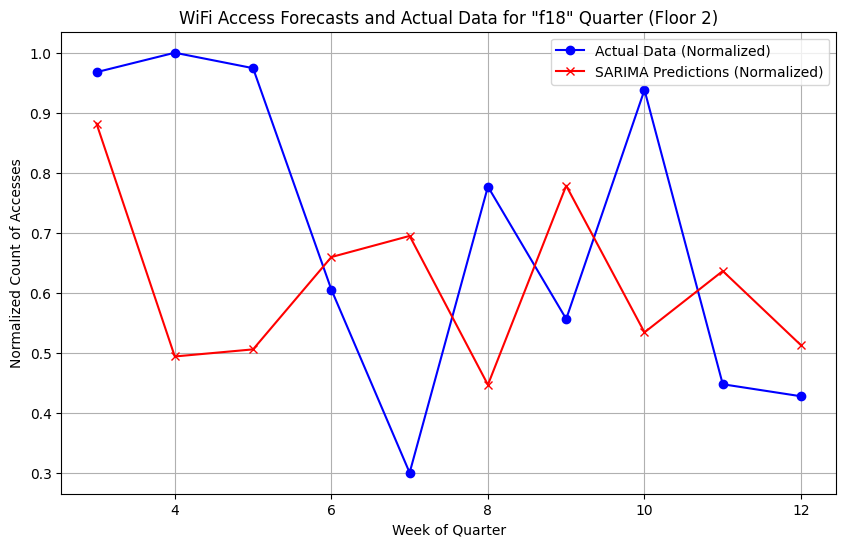

Training quarters: ['f17', 'f17_break', 'f18', 'f18_break', 's18_break', 's19', 'summer17', 'summer17_break', 'summer18_break', 'w18', 'w18_break', 'w19', 'w19_break']
Validation quarter: ['s18']


c:\Users\lavin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\lavin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\lavin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\lavin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an excepti

Quarter: s18
Mean Absolute Error (MAE): 0.21248476766392707
Mean Squared Error (MSE): 0.06374548467231934
Root Mean Squared Error (RMSE): 0.25247868161949705
Mean Absolute Error (MAE) as percentage of mean: 25.67%
Root Mean Squared Error (RMSE) as percentage of mean: 30.50%


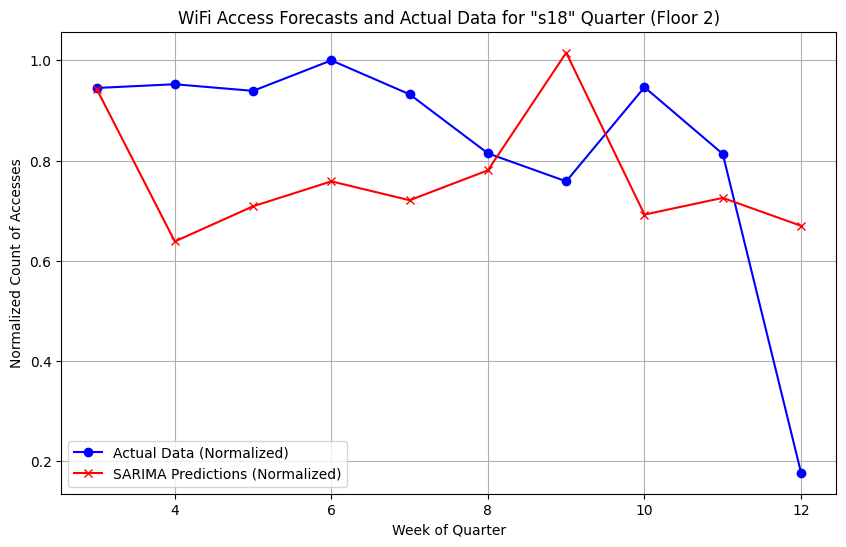

Training quarters: ['f17', 'f17_break', 'f18', 'f18_break', 's18', 's18_break', 'summer17', 'summer17_break', 'summer18_break', 'w18', 'w18_break', 'w19', 'w19_break']
Validation quarter: ['s19']


c:\Users\lavin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\lavin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\lavin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\lavin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an excepti

Quarter: s19
Mean Absolute Error (MAE): 0.43666808768526033
Mean Squared Error (MSE): 0.23133753051087153
Root Mean Squared Error (RMSE): 0.48097560282292023
Mean Absolute Error (MAE) as percentage of mean: 111.96%
Root Mean Squared Error (RMSE) as percentage of mean: 123.32%


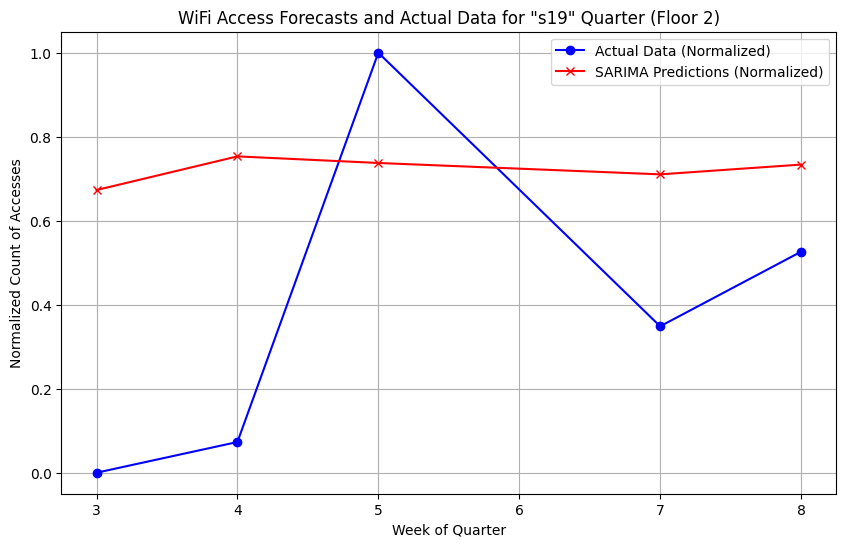

Training quarters: ['f17', 'f17_break', 'f18', 'f18_break', 's18', 's18_break', 's19', 'summer17', 'summer17_break', 'summer18_break', 'w18', 'w18_break', 'w19_break']
Validation quarter: ['w19']


c:\Users\lavin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\lavin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\lavin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\lavin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an excepti

Quarter: w19
Mean Absolute Error (MAE): 0.13636799908424607
Mean Squared Error (MSE): 0.029141739962296284
Root Mean Squared Error (RMSE): 0.17070951924920966
Mean Absolute Error (MAE) as percentage of mean: 19.67%
Root Mean Squared Error (RMSE) as percentage of mean: 24.63%


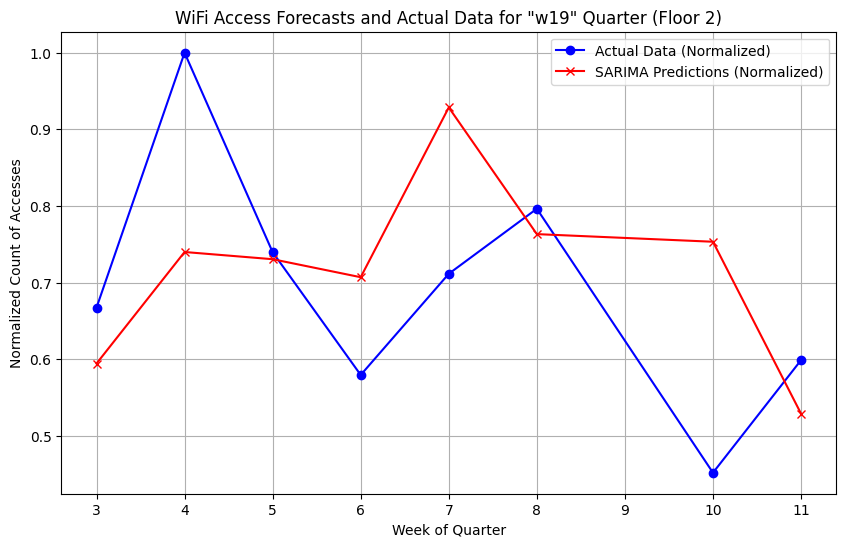

In [25]:
def normalize_counts(df):
    """ Each quarter becomes a percentage of maximum count in a week for that quarter """
    max_counts = df.groupby('startQuarter')['count'].transform('max')
    df['count_normalized'] = df['count'] / max_counts
    return df

def predict_quarter4(df, quarter_to_predict, train_quarters, floor=2, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)):
    # Filter for floor
    df_floor = df[df['floor'] == floor]
    
    # Get counts per quarter
    df_floor = df_floor.groupby(['startQuarter', 'week_of_quarter']).size().reset_index(name='count')
    
    # Normalize
    df_floor = normalize_counts(df_floor)
    
    # Train and validation sets
    train_data = df_floor[df_floor['startQuarter'].isin(train_quarters)]
    validation_data = df_floor[df_floor['startQuarter'] == quarter_to_predict]
    
    # Print train and validation quarter names to verify
    print(f'Training quarters: {train_quarters}')
    validation_quarters = validation_data['startQuarter'].unique()
    print(f'Validation quarter: {validation_quarters}')
    
    # Add first 3 weeks of predicted quarter
    additional_train_data = validation_data[validation_data['week_of_quarter'] <= 2]
    
    combined_train_data = pd.concat([train_data, additional_train_data])
    combined_train_data = combined_train_data.rename(columns={'week_of_quarter': 'ds', 'count_normalized': 'y'})
    
    # SARIMA Model
    model = SARIMAX(combined_train_data['y'], order=order, seasonal_order=seasonal_order)
    model_fit = model.fit(disp=False)
    
    # Validation
    test_data = validation_data[validation_data['week_of_quarter'] > 2]
    
    # Predict on following weeks of quarter
    forecast_normalized = model_fit.forecast(steps=len(test_data))
    
    
    # Errors
    mae = mean_absolute_error(test_data['count_normalized'], forecast_normalized)
    mse = mean_squared_error(test_data['count_normalized'], forecast_normalized)
    rmse = np.sqrt(mse)
    print(f'Quarter: {quarter_to_predict}')
    print(f'Mean Absolute Error (MAE): {mae}')
    print(f'Mean Squared Error (MSE): {mse}')
    print(f'Root Mean Squared Error (RMSE): {rmse}')
    
    mean_actual = test_data['count_normalized'].mean()
    mae_percentage = (mae / mean_actual) * 100
    rmse_percentage = (rmse / mean_actual) * 100
    
    print(f'Mean Absolute Error (MAE) as percentage of mean: {mae_percentage:.2f}%')
    print(f'Root Mean Squared Error (RMSE) as percentage of mean: {rmse_percentage:.2f}%')
    
    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(test_data['week_of_quarter'], test_data['count_normalized'], label='Actual Data (Normalized)', color='blue', marker='o')
    plt.plot(test_data['week_of_quarter'], forecast_normalized, label='SARIMA Predictions (Normalized)', color='red', marker='x')
    
    plt.title(f'WiFi Access Forecasts and Actual Data for "{quarter_to_predict}" Quarter (Floor {floor})')
    plt.xlabel('Week of Quarter')
    plt.ylabel('Normalized Count of Accesses')
    plt.legend()
    plt.grid(True)
    plt.show()


training_quarters_no_break = ['f17', 'f18', 's18', 's19', 'w19']
all_quarters = ['f17', 'f17_break', 'f18', 'f18_break', 's18', 's18_break', 's19', 'summer17', 'summer17_break', 'summer18_break', 'w18', 'w18_break', 'w19', 'w19_break']


for quarter in training_quarters_no_break:
    training_quarters = all_quarters.copy()
    training_quarters.remove(quarter) 
    predict_quarter4(df_processed_data3, quarter, training_quarters)


-- Unsupported Index, fix by resetting index, as operations like filtering may remove/misalign continuous integers: 1,2,4,5,etc

Quarter: f17
Mean Absolute Error (MAE): 0.29781793975947324
Mean Squared Error (MSE): 0.14904887745697712
Root Mean Squared Error (RMSE): 0.38606848803933363
Mean Absolute Error (MAE) as percentage of mean: 42.30%
Root Mean Squared Error (RMSE) as percentage of mean: 54.84%


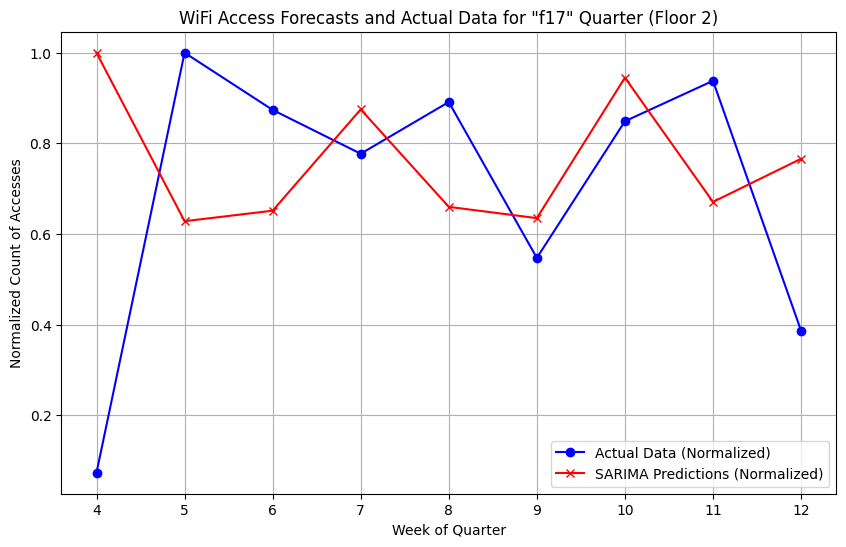

Quarter: f18
Mean Absolute Error (MAE): 0.27391261023759284
Mean Squared Error (MSE): 0.1006199379925983
Root Mean Squared Error (RMSE): 0.3172064595694708
Mean Absolute Error (MAE) as percentage of mean: 39.17%
Root Mean Squared Error (RMSE) as percentage of mean: 45.36%


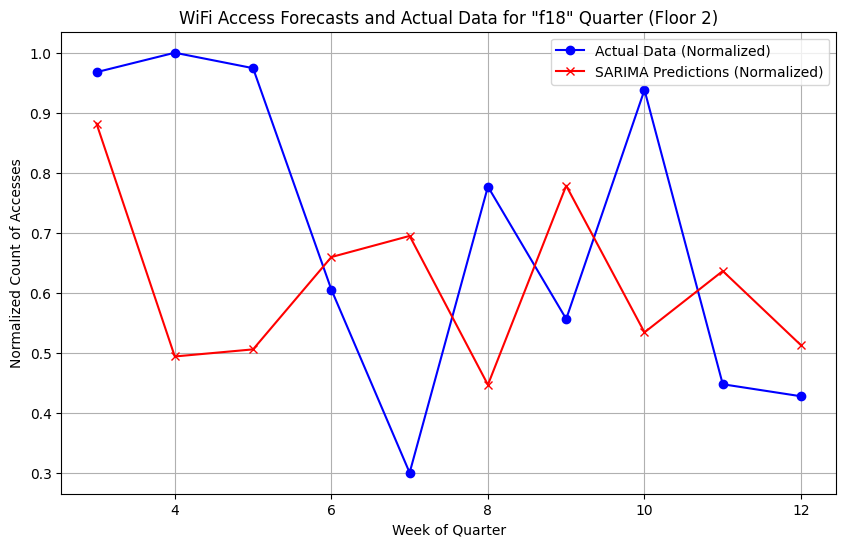

Quarter: s18
Mean Absolute Error (MAE): 0.21248476766392707
Mean Squared Error (MSE): 0.06374548467231934
Root Mean Squared Error (RMSE): 0.25247868161949705
Mean Absolute Error (MAE) as percentage of mean: 25.67%
Root Mean Squared Error (RMSE) as percentage of mean: 30.50%


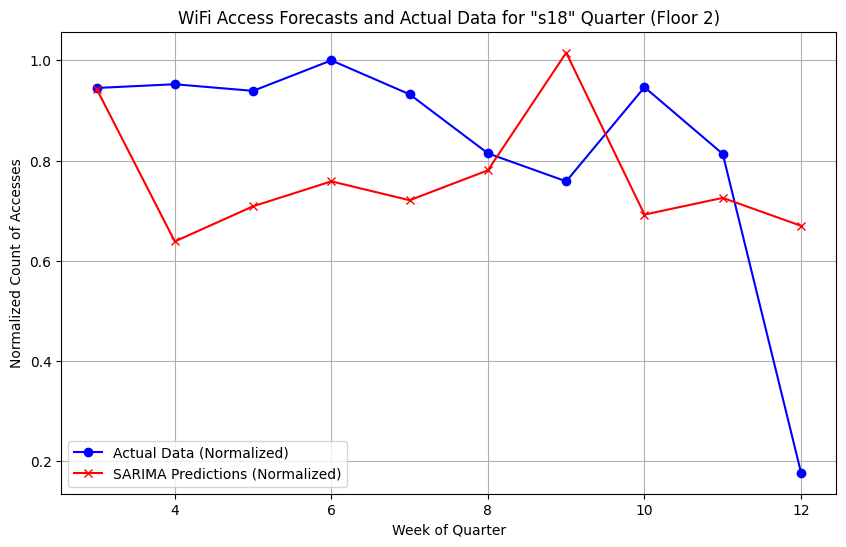

Quarter: s19
Mean Absolute Error (MAE): 0.43666808768526033
Mean Squared Error (MSE): 0.23133753051087153
Root Mean Squared Error (RMSE): 0.48097560282292023
Mean Absolute Error (MAE) as percentage of mean: 111.96%
Root Mean Squared Error (RMSE) as percentage of mean: 123.32%


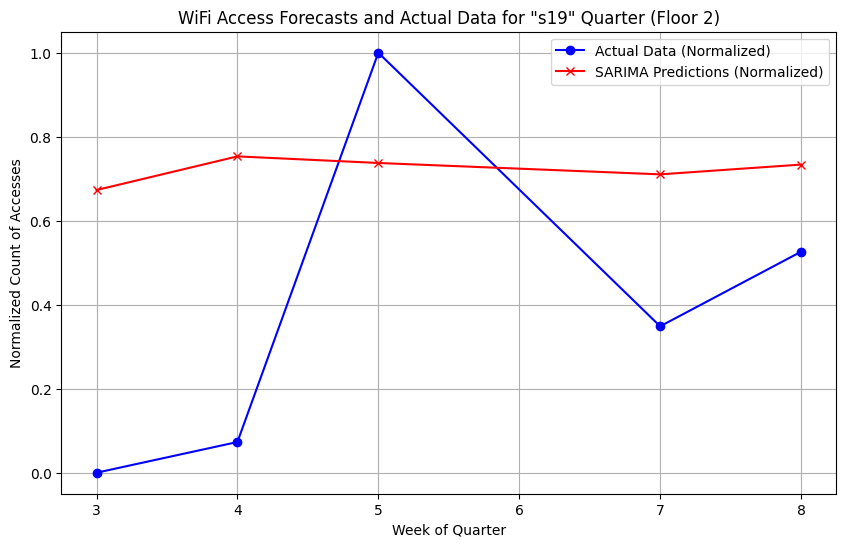

Quarter: w19
Mean Absolute Error (MAE): 0.13636799908424607
Mean Squared Error (MSE): 0.029141739962296284
Root Mean Squared Error (RMSE): 0.17070951924920966
Mean Absolute Error (MAE) as percentage of mean: 19.67%
Root Mean Squared Error (RMSE) as percentage of mean: 24.63%


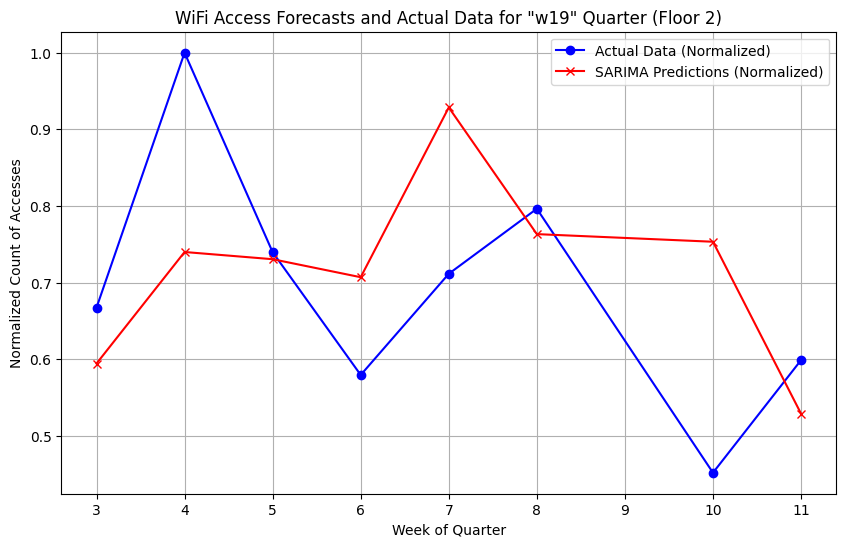

In [26]:
def normalize_counts(df):
    """ Each quarter becomes a percentage of maximum count in a week for that quarter """
    max_counts = df.groupby('startQuarter')['count'].transform('max')
    df['count_normalized'] = df['count'] / max_counts
    return df

def predict_quarter4(df, quarter_to_predict, train_quarters, floor=2, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)):
    # Filter for floor
    df_floor = df[df['floor'] == floor]
    
    # Get counts per quarter
    df_floor = df_floor.groupby(['startQuarter', 'week_of_quarter']).size().reset_index(name='count')
    
    # Normalize
    df_floor = normalize_counts(df_floor)
    # Reset index
    df_floor.reset_index(drop=True, inplace=True)

    # Train and validation sets
    train_data = df_floor[df_floor['startQuarter'].isin(train_quarters)]
    validation_data = df_floor[df_floor['startQuarter'] == quarter_to_predict]
    # Reset indices
    train_data.reset_index(drop=True, inplace=True)
    validation_data.reset_index(drop=True, inplace=True)

    # Add first 3 weeks of predicted quarter
    additional_train_data = validation_data[validation_data['week_of_quarter'] <= 2]
    # Reset index
    additional_train_data.reset_index(drop=True, inplace=True)

    
    combined_train_data = pd.concat([train_data, additional_train_data]).reset_index(drop=True)
    combined_train_data = combined_train_data.rename(columns={'week_of_quarter': 'ds', 'count_normalized': 'y'})
    
    # SARIMA Model
    model = SARIMAX(combined_train_data['y'], order=order, seasonal_order=seasonal_order)
    model_fit = model.fit(disp=False)
    
    # Validation
    test_data = validation_data[validation_data['week_of_quarter'] > 2]
    
    # Predict on following weeks of quarter
    forecast_normalized = model_fit.forecast(steps=len(test_data))
    
    
    # Errors
    mae = mean_absolute_error(test_data['count_normalized'], forecast_normalized)
    mse = mean_squared_error(test_data['count_normalized'], forecast_normalized)
    rmse = np.sqrt(mse)
    print(f'Quarter: {quarter_to_predict}')
    print(f'Mean Absolute Error (MAE): {mae}')
    print(f'Mean Squared Error (MSE): {mse}')
    print(f'Root Mean Squared Error (RMSE): {rmse}')
    
    mean_actual = test_data['count_normalized'].mean()
    mae_percentage = (mae / mean_actual) * 100
    rmse_percentage = (rmse / mean_actual) * 100
    
    print(f'Mean Absolute Error (MAE) as percentage of mean: {mae_percentage:.2f}%')
    print(f'Root Mean Squared Error (RMSE) as percentage of mean: {rmse_percentage:.2f}%')
    
    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(test_data['week_of_quarter'], test_data['count_normalized'], label='Actual Data (Normalized)', color='blue', marker='o')
    plt.plot(test_data['week_of_quarter'], forecast_normalized, label='SARIMA Predictions (Normalized)', color='red', marker='x')
    
    plt.title(f'WiFi Access Forecasts and Actual Data for "{quarter_to_predict}" Quarter (Floor {floor})')
    plt.xlabel('Week of Quarter')
    plt.ylabel('Normalized Count of Accesses')
    plt.legend()
    plt.grid(True)
    plt.show()


training_quarters_no_break = ['f17', 'f18', 's18', 's19', 'w19']
all_quarters = ['f17', 'f17_break', 'f18', 'f18_break', 's18', 's18_break', 's19', 'summer17', 'summer17_break', 'summer18_break', 'w18', 'w18_break', 'w19', 'w19_break']

for floor in [2]:
    for quarter in training_quarters_no_break:
        training_quarters = all_quarters.copy()
        training_quarters.remove(quarter) 
        predict_quarter4(df_processed_data3, quarter, training_quarters, floor)


-- Some comparisons between quarter/floor prediction error rate
-- function changes, refining

In [27]:
def normalize_counts(df):
    """ Each quarter becomes a percentage of maximum count in a week for that quarter """
    max_counts = df.groupby('startQuarter')['count'].transform('max')
    df['count_normalized'] = df['count'] / max_counts
    return df

def calculate_errors(actual, forecast):
    """Calculate error metrics (MAE, MSE, RMSE) and percentage of mean."""
    mae = mean_absolute_error(actual, forecast)
    mse = mean_squared_error(actual, forecast)
    rmse = np.sqrt(mse)
    
    mean_actual = actual.mean()
    mae_percentage = (mae / mean_actual) * 100
    rmse_percentage = (rmse / mean_actual) * 100
    print(f'Mean Absolute Error (MAE): {mae}')
    print(f'Mean Squared Error (MSE): {mse}')
    print(f'Root Mean Squared Error (RMSE): {rmse}')
    print(f'Mean Absolute Error (MAE) as percentage of mean: {mae_percentage:.2f}%')
    print(f'Root Mean Squared Error (RMSE) as percentage of mean: {rmse_percentage:.2f}%')

def predict_quarter4(df, quarter_to_predict, train_quarters, floor=2, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)):
    # Filter for floor
    df_floor = df[df['floor'] == floor]
    
    # Get counts per quarter
    df_floor = df_floor.groupby(['startQuarter', 'week_of_quarter']).size().reset_index(name='count')
    
    # Normalize
    df_floor = normalize_counts(df_floor)
    # Reset index
    df_floor.reset_index(drop=True, inplace=True)

    # Train and validation sets
    train_data = df_floor[df_floor['startQuarter'].isin(train_quarters)]
    validation_data = df_floor[df_floor['startQuarter'] == quarter_to_predict]
    # Reset indices
    train_data.reset_index(drop=True, inplace=True)
    validation_data.reset_index(drop=True, inplace=True)

    # Add first 2 weeks of predicted quarter to training set
    additional_train_data = validation_data[validation_data['week_of_quarter'] <= 2]
    # Reset index
    additional_train_data.reset_index(drop=True, inplace=True)

    combined_train_data = pd.concat([train_data, additional_train_data]).reset_index(drop=True)
    combined_train_data = combined_train_data.rename(columns={'week_of_quarter': 'ds', 'count_normalized': 'y'})
    
    # SARIMA Model
    model = SARIMAX(combined_train_data['y'], order=order, seasonal_order=seasonal_order)
    model_fit = model.fit(disp=False)
    
    # Validation
    test_data = validation_data[validation_data['week_of_quarter'] > 2]
    
    # Predict on following weeks of quarter
    forecast_normalized = model_fit.forecast(steps=len(test_data))
    
    print(f'Quarter: {quarter_to_predict}')
    
    # Errors
    calculate_errors(test_data['count_normalized'], forecast_normalized)

    
    # # Plot
    # plt.figure(figsize=(10, 6))
    # plt.plot(test_data['week_of_quarter'], test_data['count_normalized'], label='Actual Data (Normalized)', color='blue', marker='o')
    # plt.plot(test_data['week_of_quarter'], forecast_normalized, label='SARIMA Predictions (Normalized)', color='red', marker='x')
    
    # plt.title(f'WiFi Access Forecasts and Actual Data for "{quarter_to_predict}" Quarter (Floor {floor})')
    # plt.xlabel('Week of Quarter')
    # plt.ylabel('Normalized Count of Accesses')
    # plt.legend()
    # plt.grid(True)
    # plt.show()


training_quarters_no_break = ['f17', 'f18', 's18', 's19', 'w19']
all_quarters = ['f17', 'f17_break', 'f18', 'f18_break', 's18', 's18_break', 's19', 'summer17', 'summer17_break', 'summer18_break', 'w18', 'w18_break', 'w19', 'w19_break']

for floor in [2]:
    for quarter in training_quarters_no_break:
        training_quarters = all_quarters.copy()
        training_quarters.remove(quarter) 
        predict_quarter4(df_processed_data3, quarter, training_quarters, floor)


Quarter: f17
Mean Absolute Error (MAE): 0.29781793975947324
Mean Squared Error (MSE): 0.14904887745697712
Root Mean Squared Error (RMSE): 0.38606848803933363
Mean Absolute Error (MAE) as percentage of mean: 42.30%
Root Mean Squared Error (RMSE) as percentage of mean: 54.84%
Quarter: f18
Mean Absolute Error (MAE): 0.27391261023759284
Mean Squared Error (MSE): 0.1006199379925983
Root Mean Squared Error (RMSE): 0.3172064595694708
Mean Absolute Error (MAE) as percentage of mean: 39.17%
Root Mean Squared Error (RMSE) as percentage of mean: 45.36%
Quarter: s18
Mean Absolute Error (MAE): 0.21248476766392707
Mean Squared Error (MSE): 0.06374548467231934
Root Mean Squared Error (RMSE): 0.25247868161949705
Mean Absolute Error (MAE) as percentage of mean: 25.67%
Root Mean Squared Error (RMSE) as percentage of mean: 30.50%
Quarter: s19
Mean Absolute Error (MAE): 0.43666808768526033
Mean Squared Error (MSE): 0.23133753051087153
Root Mean Squared Error (RMSE): 0.48097560282292023
Mean Absolute Error

-- All floors, all main quarters, error shown

In [28]:
def normalize_counts(df):
    """ Each quarter becomes a percentage of maximum count in a week for that quarter """
    max_counts = df.groupby('startQuarter')['count'].transform('max')
    df['count_normalized'] = df['count'] / max_counts
    return df

def calculate_errors(actual, forecast):
    """Calculate error metrics (MAE, MSE, RMSE) and percentage of mean."""
    mae = mean_absolute_error(actual, forecast)
    mse = mean_squared_error(actual, forecast)
    # rmse = np.sqrt(mse)
    
    mean_actual = actual.mean()
    mae_percentage = (mae / mean_actual) * 100
    # rmse_percentage = (rmse / mean_actual) * 100
    print(f'Mean Absolute Error (MAE): {mae}')
    # print(f'Mean Squared Error (MSE): {mse}')
    # print(f'Root Mean Squared Error (RMSE): {rmse}')
    print(f'Mean Absolute Error (MAE) as percentage of mean: {mae_percentage:.2f}%')
    # print(f'Root Mean Squared Error (RMSE) as percentage of mean: {rmse_percentage:.2f}%')

def predict_quarter4(df, quarter_to_predict, train_quarters, floor=2, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)):
    # Filter for floor
    df_floor = df[df['floor'] == floor]
    
    # Get counts per quarter
    df_floor = df_floor.groupby(['startQuarter', 'week_of_quarter']).size().reset_index(name='count')
    
    # Normalize
    df_floor = normalize_counts(df_floor)
    # Reset index
    df_floor.reset_index(drop=True, inplace=True)

    # Train and validation sets
    train_data = df_floor[df_floor['startQuarter'].isin(train_quarters)]
    validation_data = df_floor[df_floor['startQuarter'] == quarter_to_predict]
    # Reset indices
    train_data.reset_index(drop=True, inplace=True)
    validation_data.reset_index(drop=True, inplace=True)

    # Add first 2 weeks of predicted quarter to training set
    additional_train_data = validation_data[validation_data['week_of_quarter'] <= 2]
    # Reset index
    additional_train_data.reset_index(drop=True, inplace=True)

    combined_train_data = pd.concat([train_data, additional_train_data]).reset_index(drop=True)
    combined_train_data = combined_train_data.rename(columns={'week_of_quarter': 'ds', 'count_normalized': 'y'})
    
    # SARIMA Model
    model = SARIMAX(combined_train_data['y'], order=order, seasonal_order=seasonal_order)
    model_fit = model.fit(disp=False)
    
    # Validation
    test_data = validation_data[validation_data['week_of_quarter'] > 2]
    
    # Predict on following weeks of quarter
    forecast_normalized = model_fit.forecast(steps=len(test_data))
    
    print(f'Quarter: {quarter_to_predict} || Floor: {floor}')
    # Errors
    calculate_errors(test_data['count_normalized'], forecast_normalized)

    
    # Plot
    # plt.figure(figsize=(10, 6))
    # plt.plot(test_data['week_of_quarter'], test_data['count_normalized'], label='Actual Data (Normalized)', color='blue', marker='o')
    # plt.plot(test_data['week_of_quarter'], forecast_normalized, label='SARIMA Predictions (Normalized)', color='red', marker='x')
    
    # plt.title(f'WiFi Access Forecasts and Actual Data for "{quarter_to_predict}" Quarter (Floor {floor})')
    # plt.xlabel('Week of Quarter')
    # plt.ylabel('Normalized Count of Accesses')
    # plt.legend()
    # plt.grid(True)
    # plt.show()

In [29]:



quarters_no_break = ['f17', 'w18', 's18', 'f18', 'w19']
all_quarters = ['f17', 'f17_break', 'f18', 'f18_break', 's18', 's18_break', 's19', 'summer17', 'summer17_break', 'summer18_break', 'w18', 'w18_break', 'w19', 'w19_break']
# s19 has missing data for all floors
# noninvertible s18 floor 3, 5
# w18 hits 0 count from week 13+ for floor 6, why is floor 13+ shown instead of cut?
for floor in [2,3,4,5,6]:
    for quarter in quarters_no_break:
        training_quarters = all_quarters.copy()
        training_quarters.remove(quarter) 
        predict_quarter4(df_processed_data3, quarter, training_quarters, floor)


Quarter: f17 || Floor: 2
Mean Absolute Error (MAE): 0.29781793975947324
Mean Absolute Error (MAE) as percentage of mean: 42.30%
Quarter: w18 || Floor: 2
Mean Absolute Error (MAE): 0.2383392104165234
Mean Absolute Error (MAE) as percentage of mean: 33.03%
Quarter: s18 || Floor: 2
Mean Absolute Error (MAE): 0.21248476766392707
Mean Absolute Error (MAE) as percentage of mean: 25.67%
Quarter: f18 || Floor: 2
Mean Absolute Error (MAE): 0.27391261023759284
Mean Absolute Error (MAE) as percentage of mean: 39.17%
Quarter: w19 || Floor: 2
Mean Absolute Error (MAE): 0.13636799908424607
Mean Absolute Error (MAE) as percentage of mean: 19.67%
Quarter: f17 || Floor: 3
Mean Absolute Error (MAE): 0.27238154022322814
Mean Absolute Error (MAE) as percentage of mean: 39.36%
Quarter: w18 || Floor: 3
Mean Absolute Error (MAE): 0.22534672232816605
Mean Absolute Error (MAE) as percentage of mean: 28.45%


c:\Users\lavin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Quarter: s18 || Floor: 3
Mean Absolute Error (MAE): 0.2114531809213811
Mean Absolute Error (MAE) as percentage of mean: 25.26%
Quarter: f18 || Floor: 3
Mean Absolute Error (MAE): 0.23137410080738832
Mean Absolute Error (MAE) as percentage of mean: 32.53%
Quarter: w19 || Floor: 3
Mean Absolute Error (MAE): 0.2479850270437962
Mean Absolute Error (MAE) as percentage of mean: 44.13%
Quarter: f17 || Floor: 4
Mean Absolute Error (MAE): 0.2830399872995874
Mean Absolute Error (MAE) as percentage of mean: 44.92%
Quarter: w18 || Floor: 4
Mean Absolute Error (MAE): 0.3433892037353852
Mean Absolute Error (MAE) as percentage of mean: 43.51%
Quarter: s18 || Floor: 4
Mean Absolute Error (MAE): 0.2344656333287658
Mean Absolute Error (MAE) as percentage of mean: 27.89%
Quarter: f18 || Floor: 4
Mean Absolute Error (MAE): 0.2480617308619196
Mean Absolute Error (MAE) as percentage of mean: 35.27%
Quarter: w19 || Floor: 4
Mean Absolute Error (MAE): 0.24949246402316927
Mean Absolute Error (MAE) as percentag

c:\Users\lavin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Quarter: w18 || Floor: 5
Mean Absolute Error (MAE): 0.266056965282384
Mean Absolute Error (MAE) as percentage of mean: 33.32%
Quarter: s18 || Floor: 5
Mean Absolute Error (MAE): 0.1905505801574881
Mean Absolute Error (MAE) as percentage of mean: 23.09%
Quarter: f18 || Floor: 5
Mean Absolute Error (MAE): 0.2727399365091082
Mean Absolute Error (MAE) as percentage of mean: 38.76%
Quarter: w19 || Floor: 5
Mean Absolute Error (MAE): 0.18605150737028653
Mean Absolute Error (MAE) as percentage of mean: 28.13%
Quarter: f17 || Floor: 6
Mean Absolute Error (MAE): 0.2937174437714031
Mean Absolute Error (MAE) as percentage of mean: 54.80%
Quarter: w18 || Floor: 6
Mean Absolute Error (MAE): 0.42347520694301727
Mean Absolute Error (MAE) as percentage of mean: 95.32%
Quarter: s18 || Floor: 6
Mean Absolute Error (MAE): 0.31446223675331564
Mean Absolute Error (MAE) as percentage of mean: 53.73%
Quarter: f18 || Floor: 6
Mean Absolute Error (MAE): 0.2888039652839168
Mean Absolute Error (MAE) as percentag

In [30]:
mae_percentages = [
    42.30, 33.03, 25.67, 39.17, 19.67, 39.36, 28.45, 25.26, 32.53, 44.13,
    44.92, 43.51, 27.89, 35.27, 37.66, 40.03, 33.32, 23.09, 38.76, 28.13,
    54.80, 95.32, 53.73, 58.62, 49.92
]

average_mae_percentage = sum(mae_percentages) / len(mae_percentages)
print(f'Average MAE percentage: {average_mae_percentage:.2f}%')


Average MAE percentage: 39.78%


-- Plots

Quarter: f17 || Floor: 2
Mean Absolute Error (MAE): 0.27992276854672093
Mean Absolute Error (MAE) as percentage of mean: 39.43%


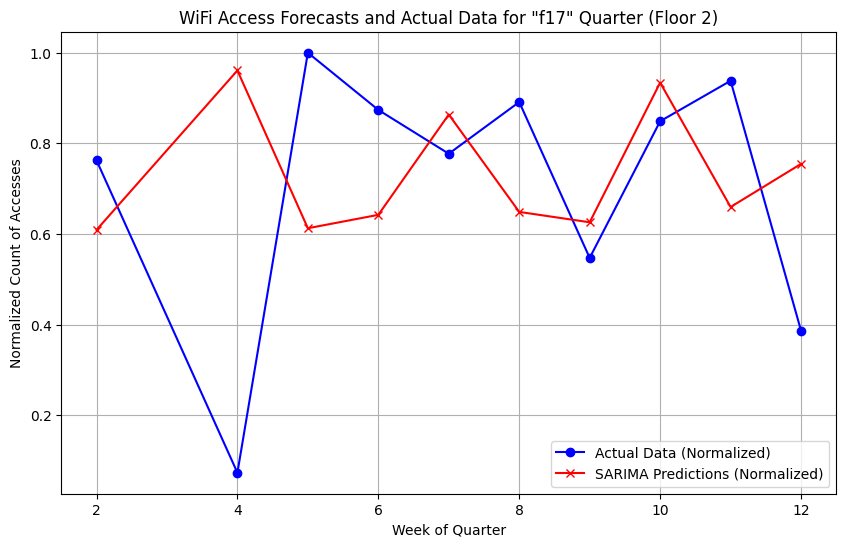

Quarter: w18 || Floor: 2
Mean Absolute Error (MAE): 0.22385350136412188
Mean Absolute Error (MAE) as percentage of mean: 31.90%


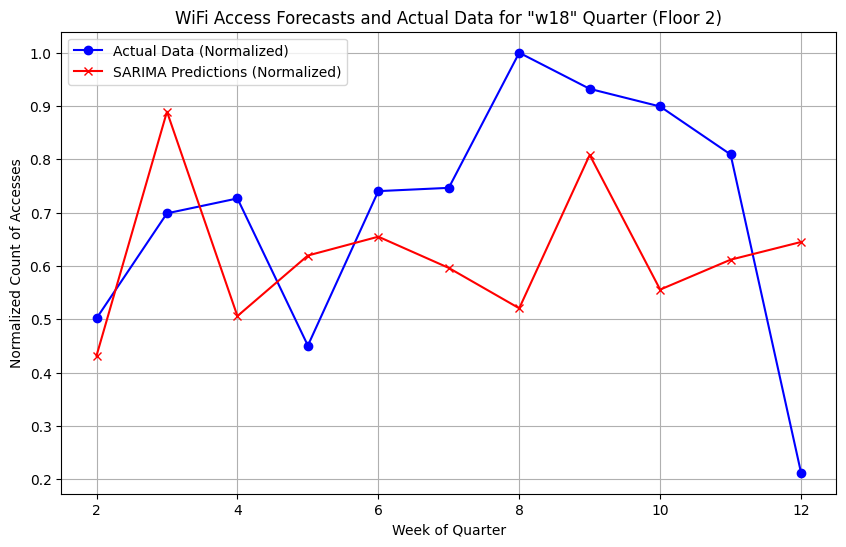

Quarter: s18 || Floor: 2
Mean Absolute Error (MAE): 0.24774899013511795
Mean Absolute Error (MAE) as percentage of mean: 29.75%


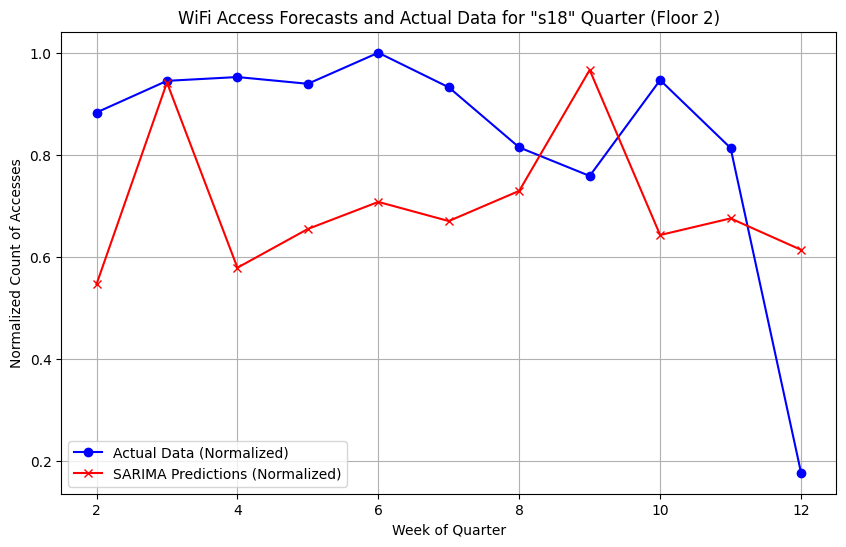

Quarter: f18 || Floor: 2
Mean Absolute Error (MAE): 0.3104078911028116
Mean Absolute Error (MAE) as percentage of mean: 48.25%


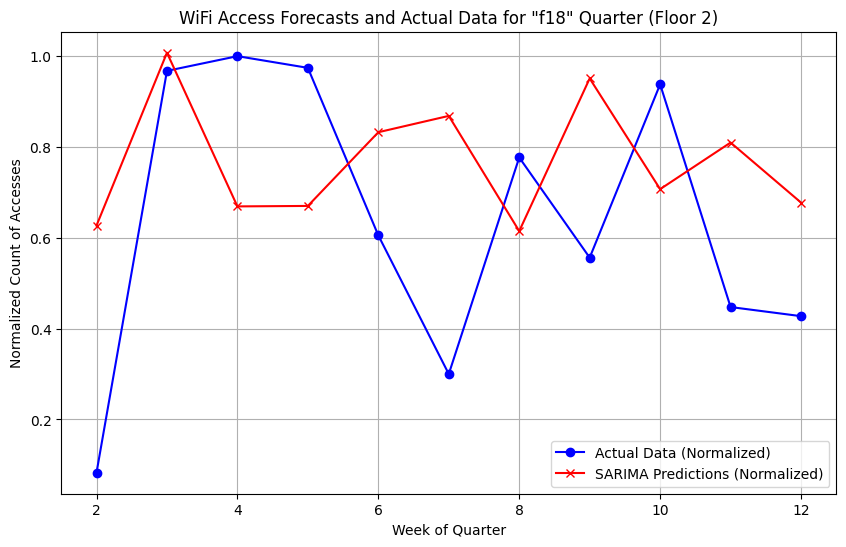

Quarter: w19 || Floor: 2
Mean Absolute Error (MAE): 0.16808544012080034
Mean Absolute Error (MAE) as percentage of mean: 23.89%


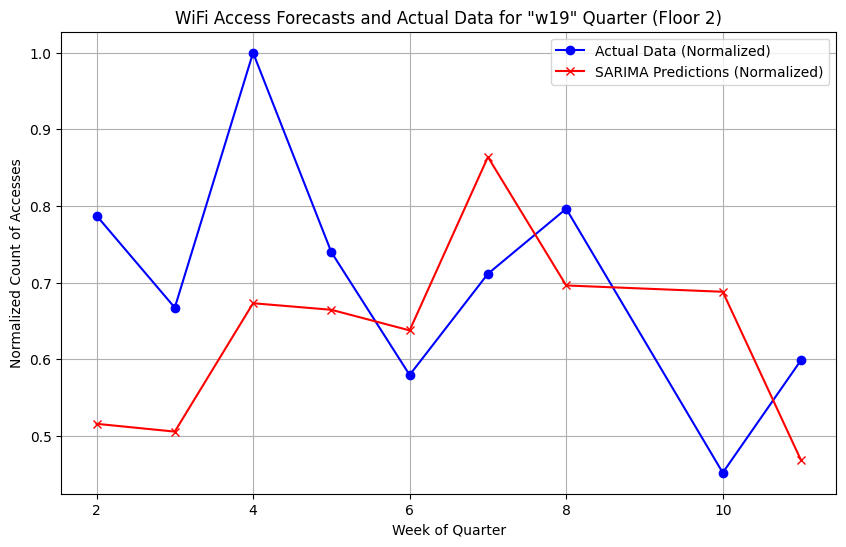

c:\Users\lavin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Quarter: f17 || Floor: 3
Mean Absolute Error (MAE): 0.24650576988224132
Mean Absolute Error (MAE) as percentage of mean: 35.93%


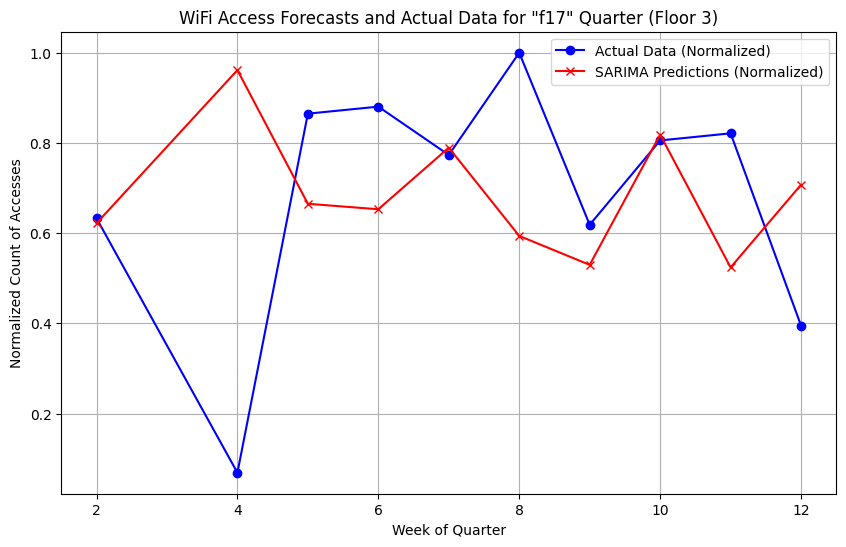

Quarter: w18 || Floor: 3
Mean Absolute Error (MAE): 0.26017369343827734
Mean Absolute Error (MAE) as percentage of mean: 33.01%


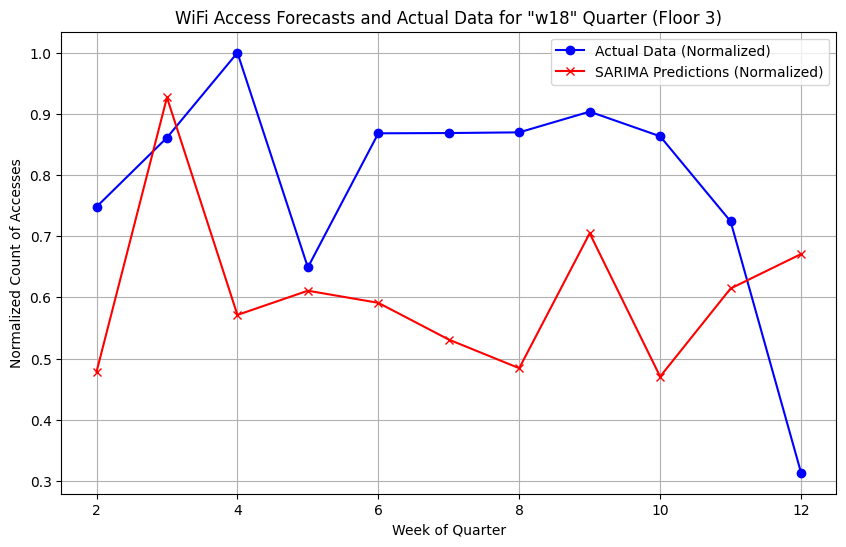

c:\Users\lavin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Quarter: s18 || Floor: 3
Mean Absolute Error (MAE): 0.2594780299405781
Mean Absolute Error (MAE) as percentage of mean: 30.91%


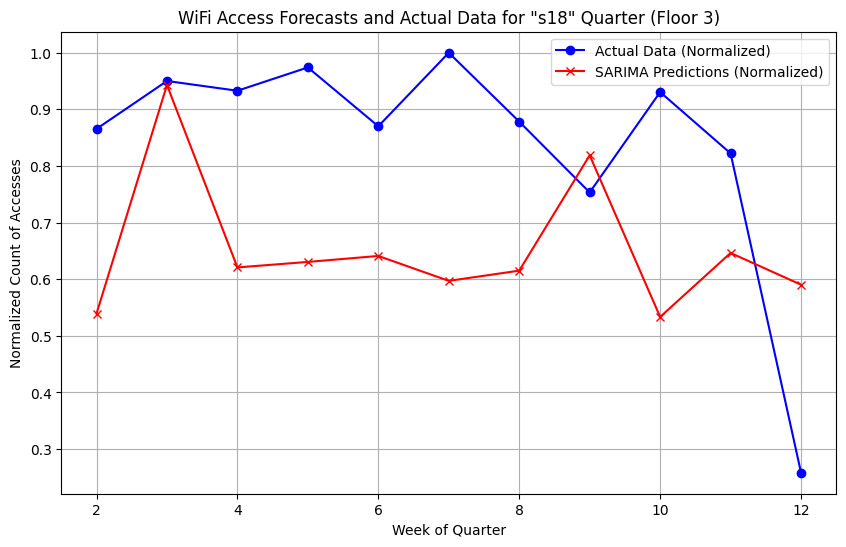

Quarter: f18 || Floor: 3
Mean Absolute Error (MAE): 0.26152625532676116
Mean Absolute Error (MAE) as percentage of mean: 40.03%


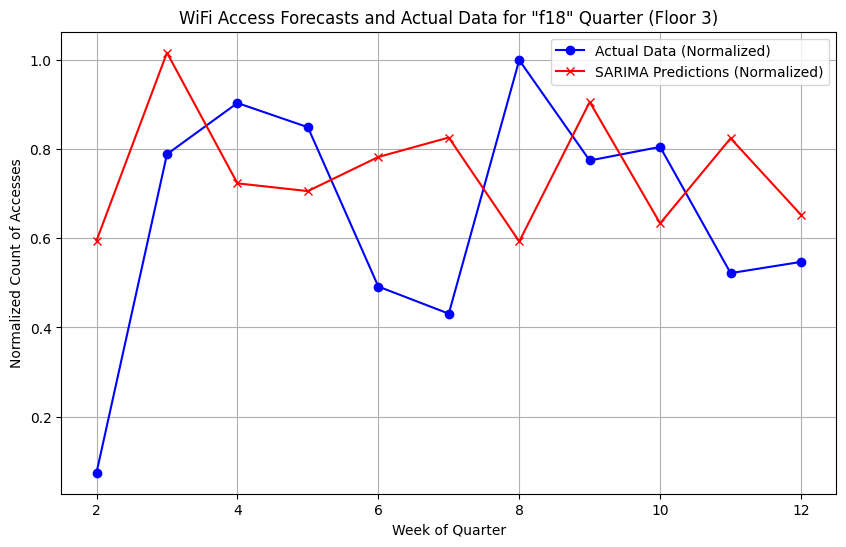

Quarter: w19 || Floor: 3
Mean Absolute Error (MAE): 0.2034342785032197
Mean Absolute Error (MAE) as percentage of mean: 33.32%


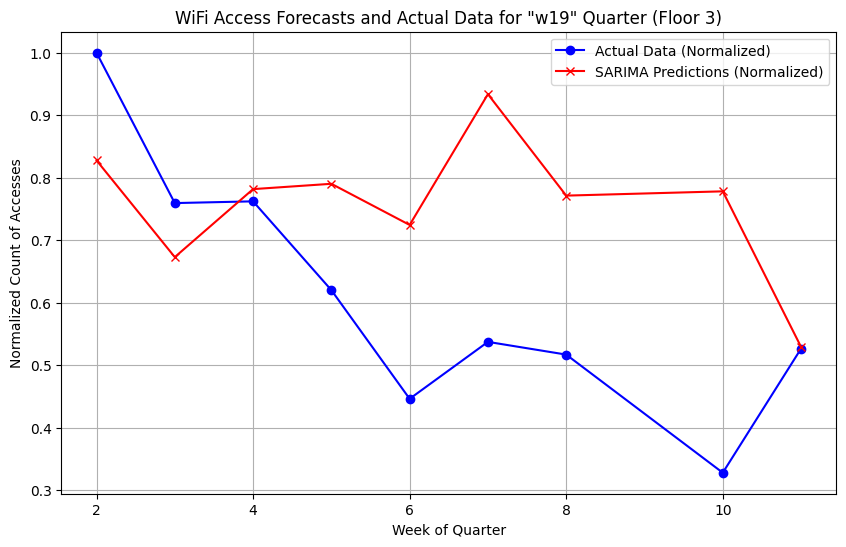

Quarter: f17 || Floor: 4
Mean Absolute Error (MAE): 0.2573738030577047
Mean Absolute Error (MAE) as percentage of mean: 39.45%


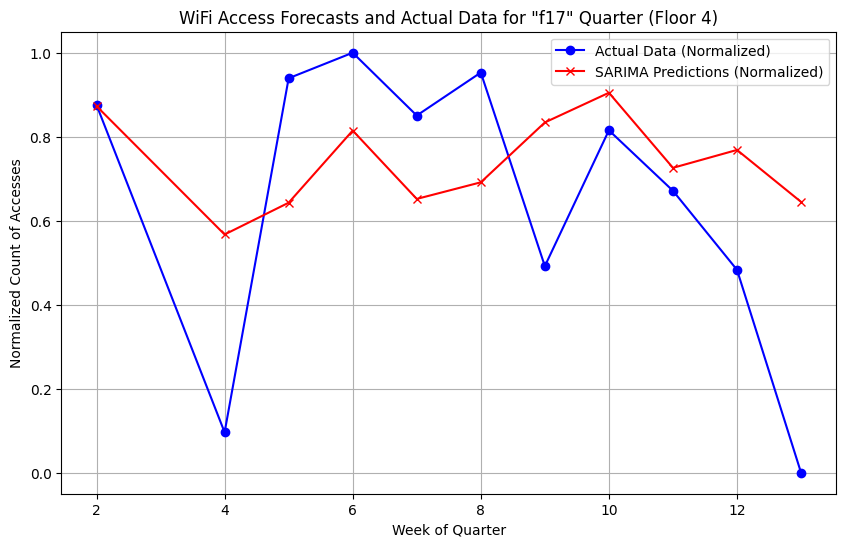

c:\Users\lavin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Quarter: w18 || Floor: 4
Mean Absolute Error (MAE): 0.27213530398371966
Mean Absolute Error (MAE) as percentage of mean: 35.10%


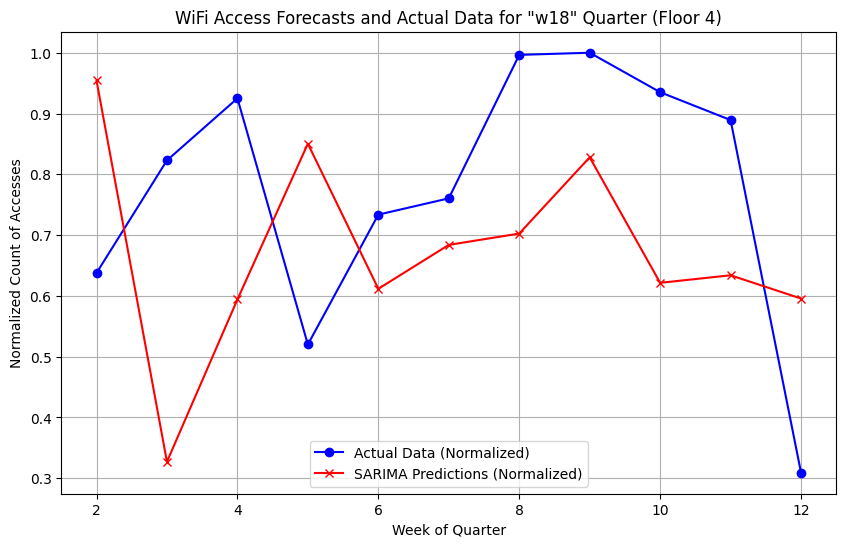

Quarter: s18 || Floor: 4
Mean Absolute Error (MAE): 0.21355843058791013
Mean Absolute Error (MAE) as percentage of mean: 25.56%


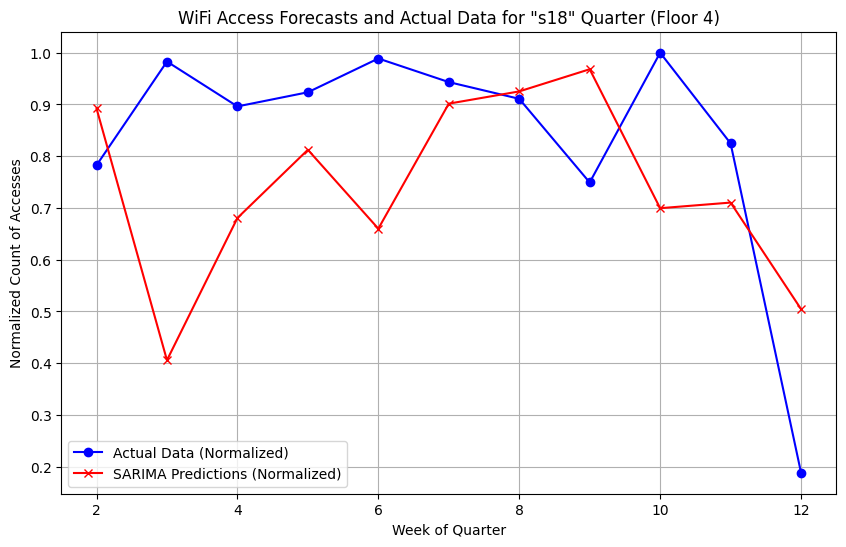

Quarter: f18 || Floor: 4
Mean Absolute Error (MAE): 0.2710505813085547
Mean Absolute Error (MAE) as percentage of mean: 42.05%


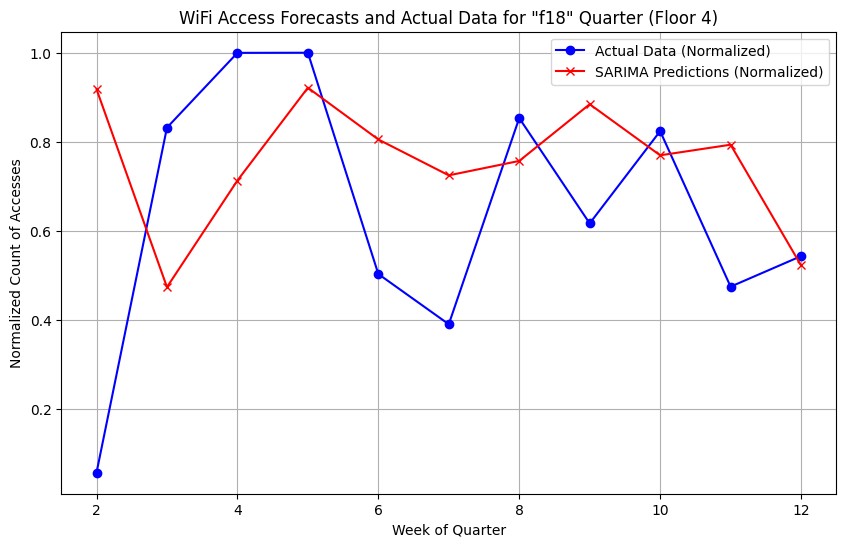

c:\Users\lavin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Quarter: w19 || Floor: 4
Mean Absolute Error (MAE): 0.2324423402096836
Mean Absolute Error (MAE) as percentage of mean: 34.82%


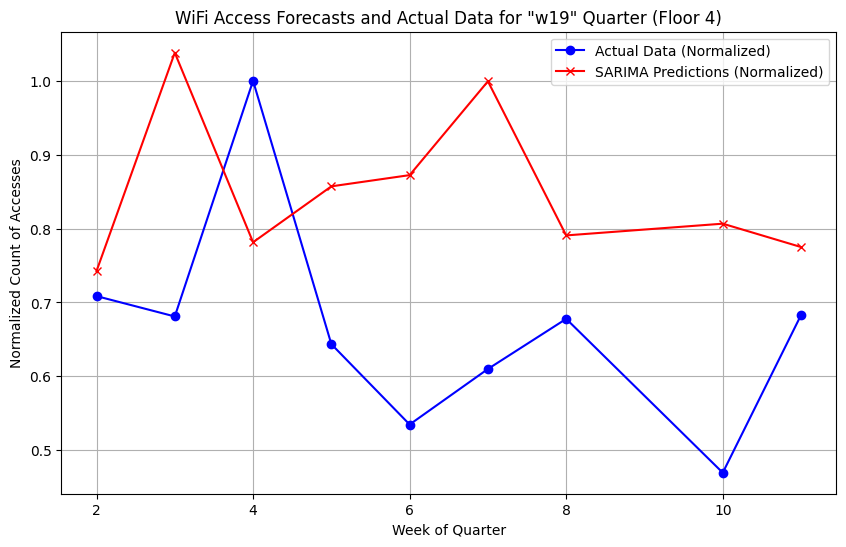

Quarter: f17 || Floor: 5
Mean Absolute Error (MAE): 0.2865828629513044
Mean Absolute Error (MAE) as percentage of mean: 42.80%


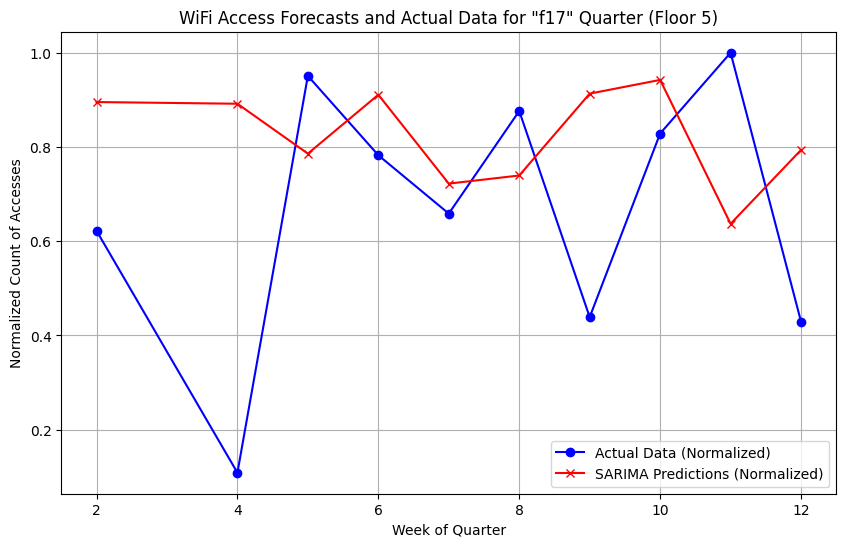

Quarter: w18 || Floor: 5
Mean Absolute Error (MAE): 0.2724631254363232
Mean Absolute Error (MAE) as percentage of mean: 34.35%


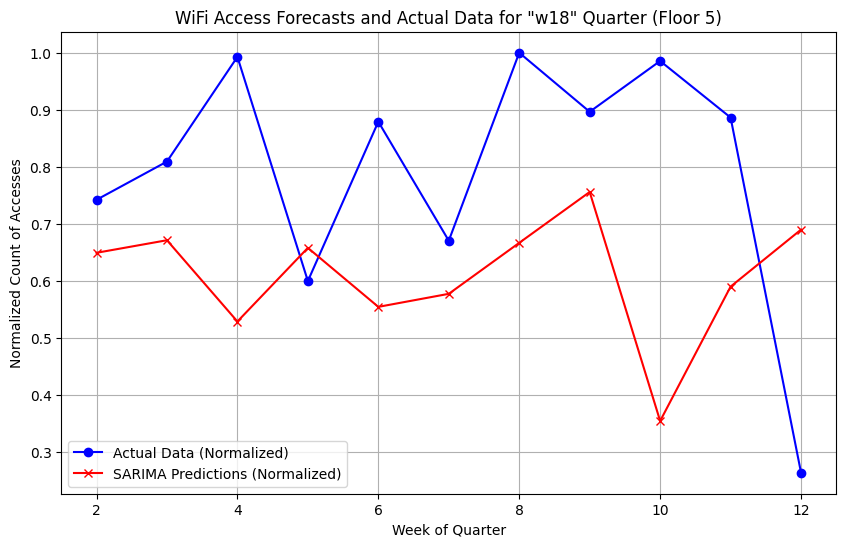

Quarter: s18 || Floor: 5
Mean Absolute Error (MAE): 0.18459075272477668
Mean Absolute Error (MAE) as percentage of mean: 22.36%


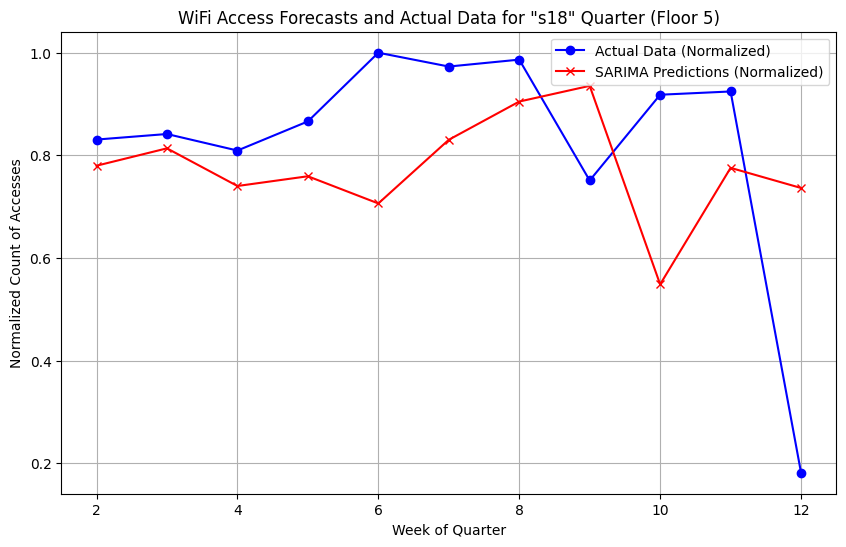

Quarter: f18 || Floor: 5
Mean Absolute Error (MAE): 0.2771696831426238
Mean Absolute Error (MAE) as percentage of mean: 42.76%


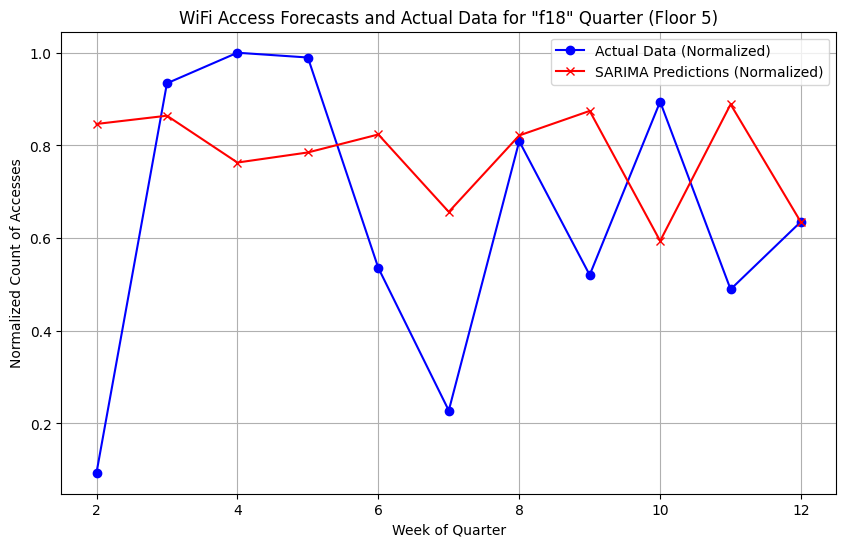

Quarter: w19 || Floor: 5
Mean Absolute Error (MAE): 0.18559923725899116
Mean Absolute Error (MAE) as percentage of mean: 27.88%


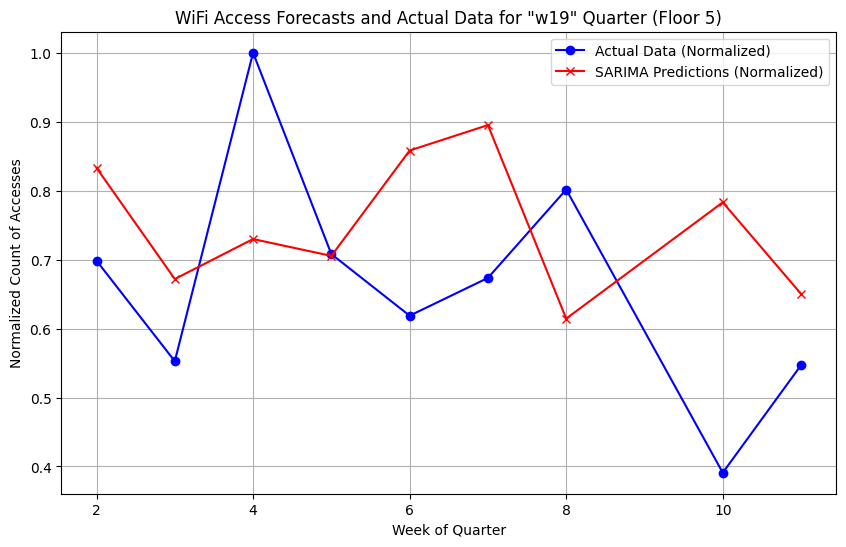

Quarter: f17 || Floor: 6
Mean Absolute Error (MAE): 0.28698778176046225
Mean Absolute Error (MAE) as percentage of mean: 51.35%


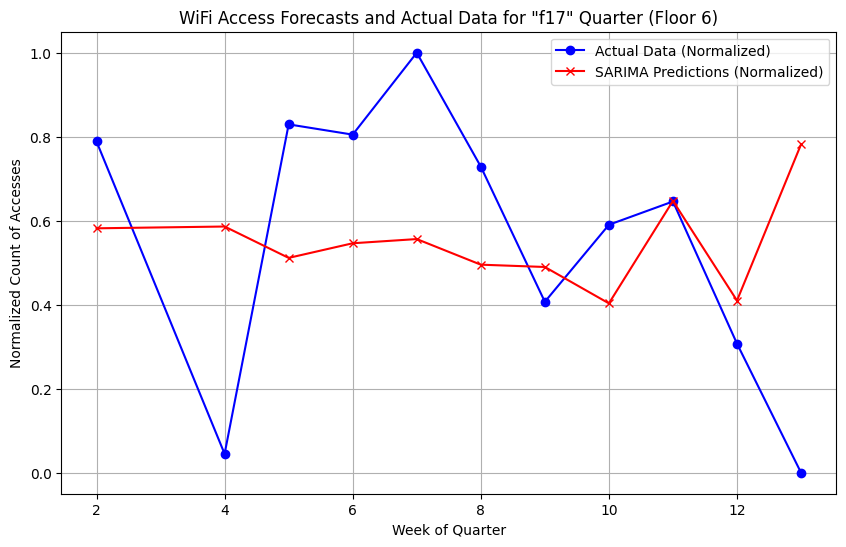

Quarter: w18 || Floor: 6
Mean Absolute Error (MAE): 0.4058900037077868
Mean Absolute Error (MAE) as percentage of mean: 89.47%


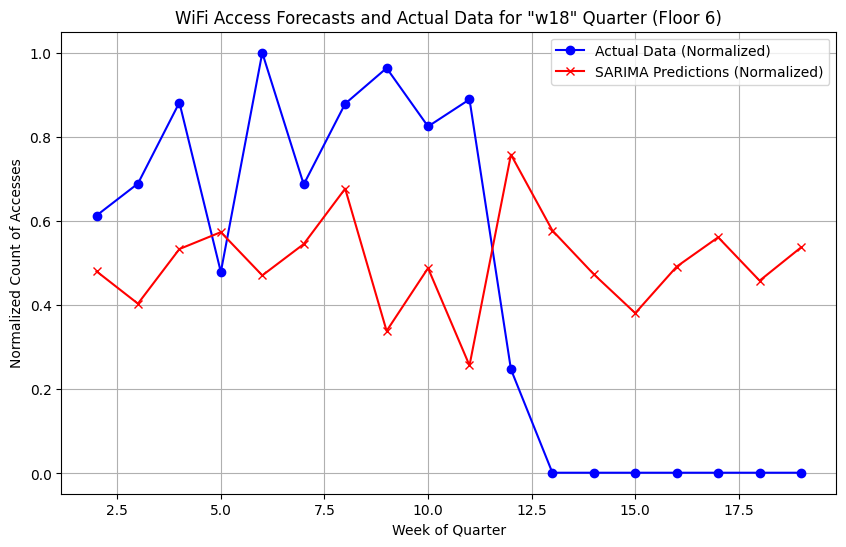

Quarter: s18 || Floor: 6
Mean Absolute Error (MAE): 0.3507818516570715
Mean Absolute Error (MAE) as percentage of mean: 56.87%


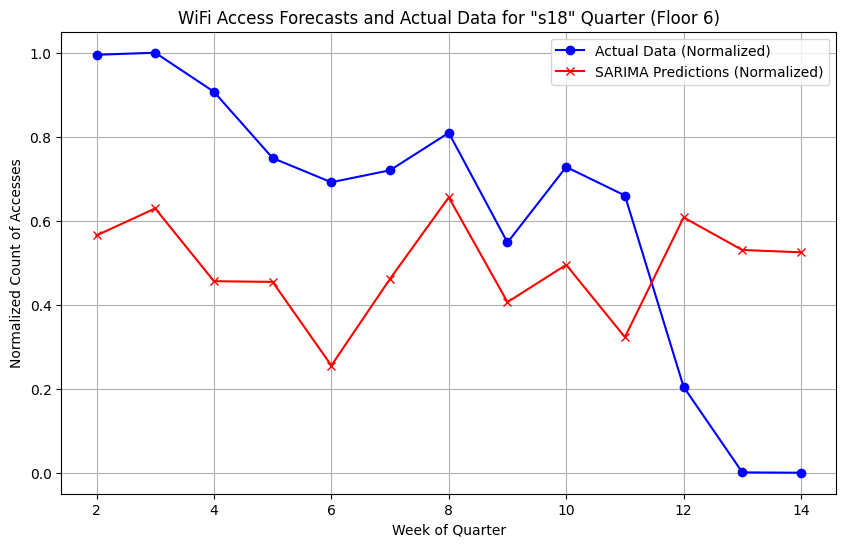

Quarter: f18 || Floor: 6
Mean Absolute Error (MAE): 0.28213822167577784
Mean Absolute Error (MAE) as percentage of mean: 61.18%


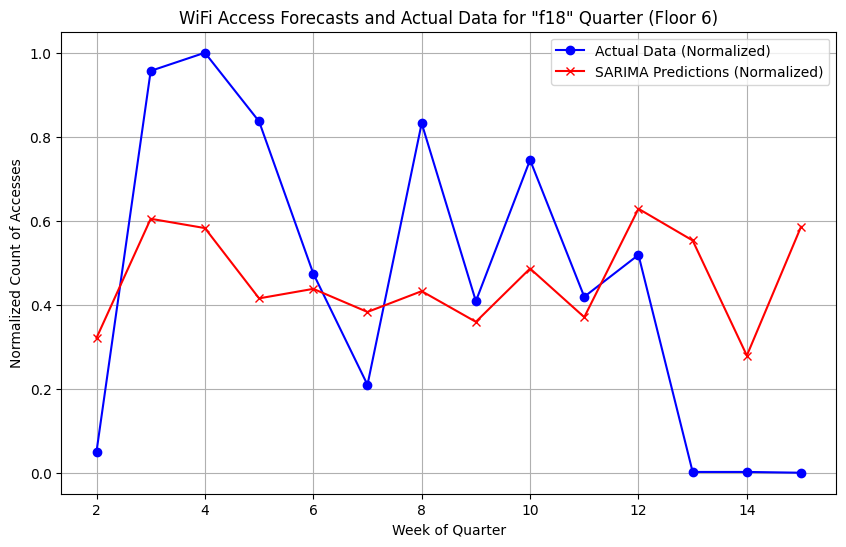

Quarter: w19 || Floor: 6
Mean Absolute Error (MAE): 0.26999050598552143
Mean Absolute Error (MAE) as percentage of mean: 48.05%


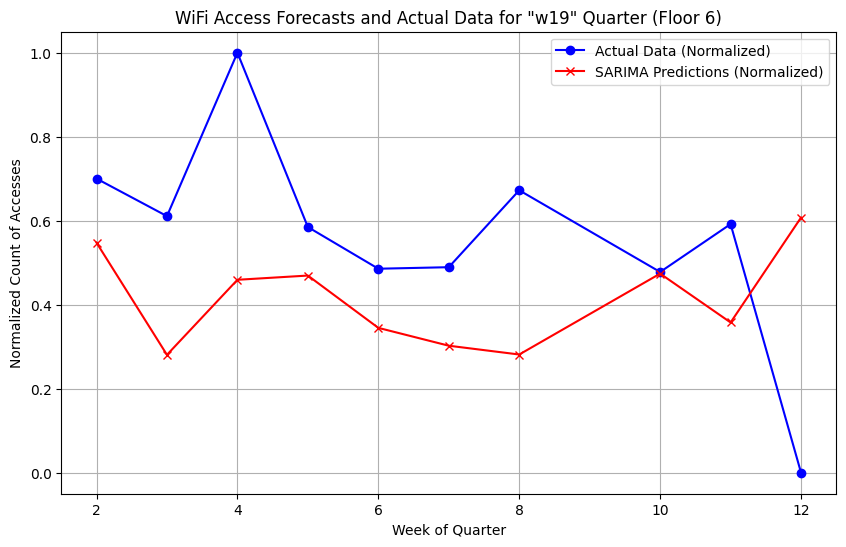

In [31]:
def normalize_counts(df):
    """ Each quarter becomes a percentage of maximum count in a week for that quarter """
    max_counts = df.groupby('startQuarter')['count'].transform('max')
    df['count_normalized'] = df['count'] / max_counts
    return df

def calculate_errors(actual, forecast):
    """Calculate error metrics (MAE, MSE, RMSE) and percentage of mean."""
    mae = mean_absolute_error(actual, forecast)
    mse = mean_squared_error(actual, forecast)
    # rmse = np.sqrt(mse)
    
    mean_actual = actual.mean()
    mae_percentage = (mae / mean_actual) * 100
    # rmse_percentage = (rmse / mean_actual) * 100
    print(f'Mean Absolute Error (MAE): {mae}')
    # print(f'Mean Squared Error (MSE): {mse}')
    # print(f'Root Mean Squared Error (RMSE): {rmse}')
    print(f'Mean Absolute Error (MAE) as percentage of mean: {mae_percentage:.2f}%')
    # print(f'Root Mean Squared Error (RMSE) as percentage of mean: {rmse_percentage:.2f}%')

def predict_quarter4(df, quarter_to_predict, train_quarters, floor=2, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)):
    # Filter for floor
    df_floor = df[df['floor'] == floor]
    
    # Get counts per quarter
    df_floor = df_floor.groupby(['startQuarter', 'week_of_quarter']).size().reset_index(name='count')
    
    # Normalize
    df_floor = normalize_counts(df_floor)
    # Reset index
    df_floor.reset_index(drop=True, inplace=True)

    # Train and validation sets
    train_data = df_floor[df_floor['startQuarter'].isin(train_quarters)]
    validation_data = df_floor[df_floor['startQuarter'] == quarter_to_predict]
    # Reset indices
    train_data.reset_index(drop=True, inplace=True)
    validation_data.reset_index(drop=True, inplace=True)

    # Add first 2 weeks of predicted quarter to training set
    additional_train_data = validation_data[validation_data['week_of_quarter'] <= 1]
    # Reset index
    additional_train_data.reset_index(drop=True, inplace=True)

    combined_train_data = pd.concat([train_data, additional_train_data]).reset_index(drop=True)
    combined_train_data = combined_train_data.rename(columns={'week_of_quarter': 'ds', 'count_normalized': 'y'})
    
    # SARIMA Model
    model = SARIMAX(combined_train_data['y'], order=order, seasonal_order=seasonal_order)
    model_fit = model.fit(disp=False)
    
    # Validation
    test_data = validation_data[validation_data['week_of_quarter'] > 1]
    
    # Predict on following weeks of quarter
    forecast_normalized = model_fit.forecast(steps=len(test_data))
    
    print(f'Quarter: {quarter_to_predict} || Floor: {floor}')
    # Errors
    calculate_errors(test_data['count_normalized'], forecast_normalized)

    
    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(test_data['week_of_quarter'], test_data['count_normalized'], label='Actual Data (Normalized)', color='blue', marker='o')
    plt.plot(test_data['week_of_quarter'], forecast_normalized, label='SARIMA Predictions (Normalized)', color='red', marker='x')
    
    plt.title(f'WiFi Access Forecasts and Actual Data for "{quarter_to_predict}" Quarter (Floor {floor})')
    plt.xlabel('Week of Quarter')
    plt.ylabel('Normalized Count of Accesses')
    plt.legend()
    plt.grid(True)
    plt.show()


quarters_no_break = ['f17', 'w18', 's18', 'f18', 'w19']
all_quarters = ['f17', 'f17_break', 'f18', 'f18_break', 's18', 's18_break', 's19', 'summer17', 'summer17_break', 'summer18_break', 'w18', 'w18_break', 'w19', 'w19_break']
# s19 has missing data for all floors
# noninvertible s18 floor 3, 5
# w18 hits 0 count from week 13+ for floor 6, why is floor 13+ shown instead of cut?
for floor in [2,3,4,5,6]:
    for quarter in quarters_no_break:
        training_quarters = all_quarters.copy()
        training_quarters.remove(quarter) 
        predict_quarter4(df_processed_data3, quarter, training_quarters, floor)


In [32]:
# fetch processed_data4 table
conn = engine.connect()

query = text("SELECT * FROM processed_data4")
results = conn.execute(query)

rows = results.fetchall()
cols = results.keys()
df_processed_data4 = pd.DataFrame(rows, columns=cols)

conn.close()

df_processed_data4

macAddress  userId      startTimestamp  \
0        00002dc6243d2a8c5108084ba322634d8255d5df  190150 2018-03-06 19:24:50   
1        00002dc6243d2a8c5108084ba322634d8255d5df  190150 2018-03-06 19:25:06   
2        00002dc6243d2a8c5108084ba322634d8255d5df  190150 2018-03-06 19:25:20   
3        00002dc6243d2a8c5108084ba322634d8255d5df  190150 2018-03-06 19:25:31   
4        00014c815769ff2a99662e77a228abc50f0ab012  174218 2017-11-22 09:16:23   
...                                           ...     ...                 ...   
1797614  22af47897bd51fd4a00fc4886860683dd63bad48  236916 2018-03-19 00:00:00   
1797615  258e22fb74c43539a1eb05ad681e991cbdd6711a  236917 2017-11-30 21:29:31   
1797616  258e22fb74c43539a1eb05ad681e991cbdd6711a  236917 2017-12-01 00:00:00   
1797617  258e22fb74c43539a1eb05ad681e991cbdd6711a  236917 2018-02-04 21:39:48   
1797618  258e22fb74c43539a1eb05ad681e991cbdd6711a  236917 2018-02-05 00:00:00   

               endTimestamp room_location  duration quarter        date  \
0       2018-03-06 19:25:06          3039      16.0     w18  2018-03-06   
1       2018-03-06 19:25:20          4232      14.0     w18  2018-03-06   
2       2018-03-06 19:25:31          5062      11.0     w18  2018-03-06   
3       2018-03-06 21:22:57          6011    7046.0     w18  2018-03-06   
4       2017-11-22 09:33:47          1407    1044.0     f17  2017-11-22   
...                     ...           ...       ...     ...         ...   
1797614 2018-03-19 00:35:09          2208    2109.0     w18  2018-03-19   
1797615 2017-11-30 23:59:59          2061    9028.0     f17  2017-11-30   
1797616 2017-12-01 01:12:47          2061    4367.0     f17  2017-12-01   
1797617 2018-02-04 23:59:59          2061    8411.0     w18  2018-02-04   
1797618 2018-02-05 00:01:23          2061      83.0     w18  2018-02-05   

         day_of_week  year  calendar_week  quarter_week  
0                  1  2018             10           9.0  
1                  1  2018             10           9.0  
2                  1  2018             10           9.0  
3                  1  2018             10           9.0  
4                  2  2017             47           8.0  
...              ...   ...            ...           ...  
1797614            0  2018             12          11.0  
1797615            3  2017             48           9.0  
1797616            4  2017             48           9.0  
1797617            6  2018              5           4.0  
1797618            0  2018              6           5.0  

[1797619 rows x 12 columns]

In [33]:
df_processed_data4

macAddress  userId      startTimestamp  \
0        00002dc6243d2a8c5108084ba322634d8255d5df  190150 2018-03-06 19:24:50   
1        00002dc6243d2a8c5108084ba322634d8255d5df  190150 2018-03-06 19:25:06   
2        00002dc6243d2a8c5108084ba322634d8255d5df  190150 2018-03-06 19:25:20   
3        00002dc6243d2a8c5108084ba322634d8255d5df  190150 2018-03-06 19:25:31   
4        00014c815769ff2a99662e77a228abc50f0ab012  174218 2017-11-22 09:16:23   
...                                           ...     ...                 ...   
1797614  22af47897bd51fd4a00fc4886860683dd63bad48  236916 2018-03-19 00:00:00   
1797615  258e22fb74c43539a1eb05ad681e991cbdd6711a  236917 2017-11-30 21:29:31   
1797616  258e22fb74c43539a1eb05ad681e991cbdd6711a  236917 2017-12-01 00:00:00   
1797617  258e22fb74c43539a1eb05ad681e991cbdd6711a  236917 2018-02-04 21:39:48   
1797618  258e22fb74c43539a1eb05ad681e991cbdd6711a  236917 2018-02-05 00:00:00   

               endTimestamp room_location  duration quarter        date  \
0       2018-03-06 19:25:06          3039      16.0     w18  2018-03-06   
1       2018-03-06 19:25:20          4232      14.0     w18  2018-03-06   
2       2018-03-06 19:25:31          5062      11.0     w18  2018-03-06   
3       2018-03-06 21:22:57          6011    7046.0     w18  2018-03-06   
4       2017-11-22 09:33:47          1407    1044.0     f17  2017-11-22   
...                     ...           ...       ...     ...         ...   
1797614 2018-03-19 00:35:09          2208    2109.0     w18  2018-03-19   
1797615 2017-11-30 23:59:59          2061    9028.0     f17  2017-11-30   
1797616 2017-12-01 01:12:47          2061    4367.0     f17  2017-12-01   
1797617 2018-02-04 23:59:59          2061    8411.0     w18  2018-02-04   
1797618 2018-02-05 00:01:23          2061      83.0     w18  2018-02-05   

         day_of_week  year  calendar_week  quarter_week  
0                  1  2018             10           9.0  
1                  1  2018             10           9.0  
2                  1  2018             10           9.0  
3                  1  2018             10           9.0  
4                  2  2017             47           8.0  
...              ...   ...            ...           ...  
1797614            0  2018             12          11.0  
1797615            3  2017             48           9.0  
1797616            4  2017             48           9.0  
1797617            6  2018              5           4.0  
1797618            0  2018              6           5.0  

[1797619 rows x 12 columns]

In [34]:
# Create a new column for the week number of the year
df_processed_data4['week'] = df_processed_data4['startTimestamp'].dt.isocalendar().week

# Print
df_processed_data4

# Each quarter should start at week 0. find earliest time, set as week 0, set following weeks based on that
# Group by startQuarter, find min timestamp for each quarter
quarter_min_timestamps = df_processed_data4.groupby('quarter')['startTimestamp'].min()

# Assign week per quarter based on min timestamp
def assign_week_of_quarter(row):
    quarter_start = quarter_min_timestamps[row['quarter']]
    return (row['startTimestamp'] - quarter_start).days // 7 + 1

# Create new column week_of_quarter
df_processed_data4['week_of_quarter'] = df_processed_data4.apply(assign_week_of_quarter, axis=1)

# Print
df_processed_data4

# Set 'out' room_locations as 0
df_processed_data4['floor'] = df_processed_data4['room_location'].apply(lambda x: 0 if x == 'out' else int(x[0]))
df_processed_data4



macAddress  userId      startTimestamp  \
0        00002dc6243d2a8c5108084ba322634d8255d5df  190150 2018-03-06 19:24:50   
1        00002dc6243d2a8c5108084ba322634d8255d5df  190150 2018-03-06 19:25:06   
2        00002dc6243d2a8c5108084ba322634d8255d5df  190150 2018-03-06 19:25:20   
3        00002dc6243d2a8c5108084ba322634d8255d5df  190150 2018-03-06 19:25:31   
4        00014c815769ff2a99662e77a228abc50f0ab012  174218 2017-11-22 09:16:23   
...                                           ...     ...                 ...   
1797614  22af47897bd51fd4a00fc4886860683dd63bad48  236916 2018-03-19 00:00:00   
1797615  258e22fb74c43539a1eb05ad681e991cbdd6711a  236917 2017-11-30 21:29:31   
1797616  258e22fb74c43539a1eb05ad681e991cbdd6711a  236917 2017-12-01 00:00:00   
1797617  258e22fb74c43539a1eb05ad681e991cbdd6711a  236917 2018-02-04 21:39:48   
1797618  258e22fb74c43539a1eb05ad681e991cbdd6711a  236917 2018-02-05 00:00:00   

               endTimestamp room_location  duration quarter        date  \
0       2018-03-06 19:25:06          3039      16.0     w18  2018-03-06   
1       2018-03-06 19:25:20          4232      14.0     w18  2018-03-06   
2       2018-03-06 19:25:31          5062      11.0     w18  2018-03-06   
3       2018-03-06 21:22:57          6011    7046.0     w18  2018-03-06   
4       2017-11-22 09:33:47          1407    1044.0     f17  2017-11-22   
...                     ...           ...       ...     ...         ...   
1797614 2018-03-19 00:35:09          2208    2109.0     w18  2018-03-19   
1797615 2017-11-30 23:59:59          2061    9028.0     f17  2017-11-30   
1797616 2017-12-01 01:12:47          2061    4367.0     f17  2017-12-01   
1797617 2018-02-04 23:59:59          2061    8411.0     w18  2018-02-04   
1797618 2018-02-05 00:01:23          2061      83.0     w18  2018-02-05   

         day_of_week  year  calendar_week  quarter_week  week  \
0                  1  2018             10           9.0    10   
1                  1  2018             10           9.0    10   
2                  1  2018             10           9.0    10   
3                  1  2018             10           9.0    10   
4                  2  2017             47           8.0    47   
...              ...   ...            ...           ...   ...   
1797614            0  2018             12          11.0    12   
1797615            3  2017             48           9.0    48   
1797616            4  2017             48           9.0    48   
1797617            6  2018              5           4.0     5   
1797618            0  2018              6           5.0     6   

         week_of_quarter  floor  
0                      9      3  
1                      9      4  
2                      9      5  
3                      9      6  
4                      9      1  
...                  ...    ...  
1797614               11      2  
1797615               10      2  
1797616               10      2  
1797617                5      2  
1797618                5      2  

[1797619 rows x 15 columns]

In [35]:
def normalize_counts(df):
    """ Each quarter becomes a percentage of maximum count in a week for that quarter """
    max_counts = df.groupby('quarter')['count'].transform('max')
    df['count_normalized'] = df['count'] / max_counts
    return df

def calculate_errors(actual, forecast):
    """Calculate error metrics (MAE, MSE, RMSE) and percentage of mean."""
    mae = mean_absolute_error(actual, forecast)
    mse = mean_squared_error(actual, forecast)
    # rmse = np.sqrt(mse)
    
    mean_actual = actual.mean()
    mae_percentage = (mae / mean_actual) * 100
    # rmse_percentage = (rmse / mean_actual) * 100
    print(f'Mean Absolute Error (MAE): {mae}')
    # print(f'Mean Squared Error (MSE): {mse}')
    # print(f'Root Mean Squared Error (RMSE): {rmse}')
    print(f'Mean Absolute Error (MAE) as percentage of mean: {mae_percentage:.2f}%')
    # print(f'Root Mean Squared Error (RMSE) as percentage of mean: {rmse_percentage:.2f}%')
    return mae_percentage
    
def predict_quarter_processed_4(df, quarter_to_predict, train_quarters, floor=2, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)):
    # Filter for floor
    df_floor = df[df['floor'] == floor]
    
    # Get counts per quarter
    df_floor = df_floor.groupby(['quarter', 'week_of_quarter']).size().reset_index(name='count')
    
    # Normalize
    df_floor = normalize_counts(df_floor)
    # Reset index
    df_floor.reset_index(drop=True, inplace=True)

    # Train and validation sets
    train_data = df_floor[df_floor['quarter'].isin(train_quarters)]
    validation_data = df_floor[df_floor['quarter'] == quarter_to_predict]
    # Reset indices
    train_data.reset_index(drop=True, inplace=True)
    validation_data.reset_index(drop=True, inplace=True)

    # Add first 2 weeks of predicted quarter to training set
    additional_train_data = validation_data[validation_data['week_of_quarter'] <= 2]
    # Reset index
    additional_train_data.reset_index(drop=True, inplace=True)

    combined_train_data = pd.concat([train_data, additional_train_data]).reset_index(drop=True)
    combined_train_data = combined_train_data.rename(columns={'week_of_quarter': 'ds', 'count_normalized': 'y'})
    
    # SARIMA Model
    model = SARIMAX(combined_train_data['y'], order=order, seasonal_order=seasonal_order)
    model_fit = model.fit(disp=False)
    
    # Validation
    test_data = validation_data[validation_data['week_of_quarter'] > 2]
    
    # Predict on following weeks of quarter
    forecast_normalized = model_fit.forecast(steps=len(test_data))
    
    print(f'Quarter: {quarter_to_predict} || Floor: {floor}')
    # Errors
    mae_percentage = calculate_errors(test_data['count_normalized'], forecast_normalized)
    print(mae_percentage)
    return mae_percentage
    
    # Plot
    # plt.figure(figsize=(10, 6))
    # plt.plot(test_data['week_of_quarter'], test_data['count_normalized'], label='Actual Data (Normalized)', color='blue', marker='o')
    # plt.plot(test_data['week_of_quarter'], forecast_normalized, label='SARIMA Predictions (Normalized)', color='red', marker='x')
    
    # plt.title(f'WiFi Access Forecasts and Actual Data for "{quarter_to_predict}" Quarter (Floor {floor})')
    # plt.xlabel('Week of Quarter')
    # plt.ylabel('Normalized Count of Accesses')
    # plt.legend()
    # plt.grid(True)
    # plt.show()

In [36]:



quarters_no_break = ['f17', 'w18', 's18', 'f18', 'w19']
all_quarters = ['f17', 'f17_break', 'f18', 'f18_break', 's18', 's18_break', 's19', 'summer17', 'summer17_break', 'summer18_break', 'w18', 'w18_break', 'w19', 'w19_break']
# s19 has missing data for all floors
# noninvertible s18 floor 3, 5
# w18 hits 0 count from week 13+ for floor 6, why is floor 13+ shown instead of cut?
mae_percentages = []
for floor in [2,3,4,5,6]:
    for quarter in quarters_no_break:
        training_quarters = all_quarters.copy()
        training_quarters.remove(quarter) 
        mae_percentages.append(predict_quarter_processed_4(df_processed_data4, quarter, training_quarters, floor))
        




Quarter: f17 || Floor: 2
Mean Absolute Error (MAE): 0.2224795067994268
Mean Absolute Error (MAE) as percentage of mean: 31.15%
31.151776340231162
Quarter: w18 || Floor: 2
Mean Absolute Error (MAE): 0.37565154434421544
Mean Absolute Error (MAE) as percentage of mean: 51.36%
51.357551175539925
Quarter: s18 || Floor: 2
Mean Absolute Error (MAE): 0.30588602317397084
Mean Absolute Error (MAE) as percentage of mean: 36.69%
36.68508250577326
Quarter: f18 || Floor: 2
Mean Absolute Error (MAE): 0.33574226555126097
Mean Absolute Error (MAE) as percentage of mean: 47.43%
47.434432230503155
Quarter: w19 || Floor: 2
Mean Absolute Error (MAE): 0.19576026805523997
Mean Absolute Error (MAE) as percentage of mean: 31.35%
31.350908546000806
Quarter: f17 || Floor: 3
Mean Absolute Error (MAE): 0.2739736510703695
Mean Absolute Error (MAE) as percentage of mean: 39.01%
39.012736813302084
Quarter: w18 || Floor: 3
Mean Absolute Error (MAE): 0.21152260325294597
Mean Absolute Error (MAE) as percentage of mean: 

c:\Users\lavin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Quarter: s18 || Floor: 4
Mean Absolute Error (MAE): 0.3490580149290566
Mean Absolute Error (MAE) as percentage of mean: 41.21%
41.20958380027244
Quarter: f18 || Floor: 4
Mean Absolute Error (MAE): 0.3670429282013531
Mean Absolute Error (MAE) as percentage of mean: 51.54%
51.54104104791137
Quarter: w19 || Floor: 4
Mean Absolute Error (MAE): 0.23889647109186093
Mean Absolute Error (MAE) as percentage of mean: 39.22%
39.22347584580406
Quarter: f17 || Floor: 5
Mean Absolute Error (MAE): 0.275686496904432
Mean Absolute Error (MAE) as percentage of mean: 40.25%
40.248513454534205
Quarter: w18 || Floor: 5
Mean Absolute Error (MAE): 0.32722487905308306
Mean Absolute Error (MAE) as percentage of mean: 40.55%
40.551627470186155
Quarter: s18 || Floor: 5
Mean Absolute Error (MAE): 0.28230029494527364
Mean Absolute Error (MAE) as percentage of mean: 33.98%
33.98300063440514
Quarter: f18 || Floor: 5
Mean Absolute Error (MAE): 0.3799230320222345
Mean Absolute Error (MAE) as percentage of mean: 53.05%

In [37]:
print(mae_percentages)
mae_avg = 0
for item in mae_percentages:
    if isinstance(item, (int, float)):
        mae_avg += item

mae_avg = mae_avg/len(mae_percentages)
print(f'Average Absolute Error (MAE) percentage: {mae_avg:.2f}%')

[31.151776340231162, 51.357551175539925, 36.68508250577326, 47.434432230503155, 31.350908546000806, 39.012736813302084, 26.422061981780136, 29.28463883599489, 39.58694135062272, 48.57217535936987, 35.230609259056564, 37.12080753816354, 41.20958380027244, 51.54104104791137, 39.22347584580406, 40.248513454534205, 40.551627470186155, 33.98300063440514, 53.04958275630587, 35.49307294718172, 43.61690217373489, 33.27522419050885, 25.568846678225803, 33.08835622903926, 48.6465976274665]
Average Absolute Error (MAE) percentage: 38.91%


In [38]:
def normalize_counts(df):
    """ Each quarter becomes a percentage of maximum count in a week for that quarter """
    max_counts = df.groupby('quarter')['count'].transform('max')
    df['count_normalized'] = df['count'] / max_counts
    return df

def calculate_errors(actual, forecast):
    """Calculate error metrics (MAE, MSE, RMSE) and percentage of mean."""
    mae = mean_absolute_error(actual, forecast)
    mse = mean_squared_error(actual, forecast)
    # rmse = np.sqrt(mse)
    
    mean_actual = actual.mean()
    mae_percentage = (mae / mean_actual) * 100
    # rmse_percentage = (rmse / mean_actual) * 100
    # print(f'Mean Absolute Error (MAE): {mae}')
    # print(f'Mean Squared Error (MSE): {mse}')
    # print(f'Root Mean Squared Error (RMSE): {rmse}')
    print(f'Mean Absolute Error (MAE) as percentage of mean: {mae_percentage:.2f}%')
    # print(f'Root Mean Squared Error (RMSE) as percentage of mean: {rmse_percentage:.2f}%')
    return mae_percentage
    
def predict_quarter_processed_4(df, quarter_to_predict, train_quarters, floor=2, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)):
    # Filter for floor
    df_floor = df[df['floor'] == floor]
    
    # Get counts per quarter
    df_floor = df_floor.groupby(['quarter', 'week_of_quarter']).size().reset_index(name='count')
    
    # Normalize
    df_floor = normalize_counts(df_floor)
    # Reset index
    df_floor.reset_index(drop=True, inplace=True)

    # Train and validation sets
    train_data = df_floor[df_floor['quarter'].isin(train_quarters)]
    validation_data = df_floor[df_floor['quarter'] == quarter_to_predict]
    # Reset indices
    train_data.reset_index(drop=True, inplace=True)
    validation_data.reset_index(drop=True, inplace=True)

    # Add first 2 weeks of predicted quarter to training set
    additional_train_data = validation_data[validation_data['week_of_quarter'] <= 2]
    # Reset index
    additional_train_data.reset_index(drop=True, inplace=True)

    combined_train_data = pd.concat([train_data, additional_train_data]).reset_index(drop=True)
    combined_train_data = combined_train_data.rename(columns={'week_of_quarter': 'ds', 'count_normalized': 'y'})
    
    # SARIMA Model
    model = SARIMAX(combined_train_data['y'], order=order, seasonal_order=seasonal_order)
    model_fit = model.fit(disp=False)
    
    # Validation
    test_data = validation_data[validation_data['week_of_quarter'] > 2]
    
    # Predict on following weeks of quarter
    forecast_normalized = model_fit.forecast(steps=len(test_data))
    
    print(f'Quarter: {quarter_to_predict} || Floor: {floor}')
    # Errors
    mae_percentage = calculate_errors(test_data['count_normalized'], forecast_normalized)
    print(mae_percentage)
    
    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(test_data['week_of_quarter'], test_data['count_normalized'], label='Actual Data (Normalized)', color='blue', marker='o')
    plt.plot(test_data['week_of_quarter'], forecast_normalized, label='SARIMA Predictions (Normalized)', color='red', marker='x')
    
    plt.title(f'WiFi Access Forecasts and Actual Data for "{quarter_to_predict}" Quarter (Floor {floor})')
    plt.xlabel('Week of Quarter')
    plt.ylabel('Normalized Count of Accesses')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return mae_percentage

Quarter: f17 || Floor: 2
Mean Absolute Error (MAE) as percentage of mean: 31.15%
31.151776340231162


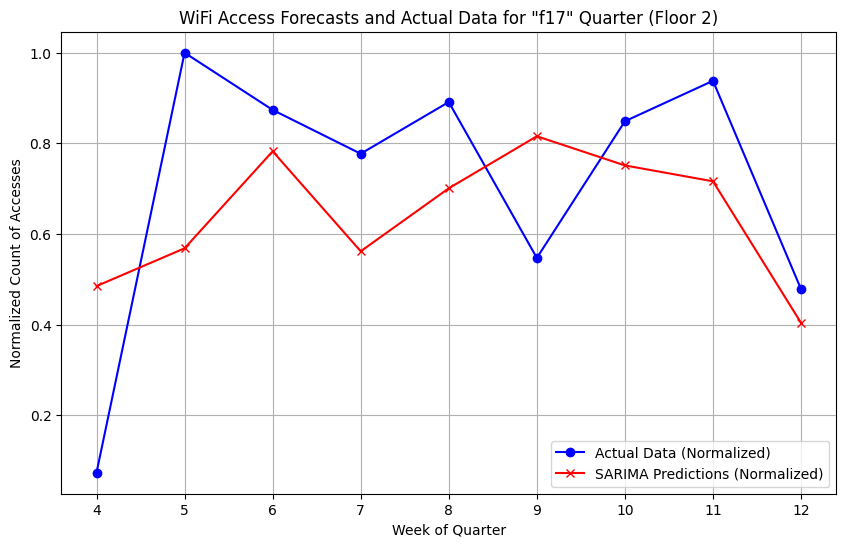

Quarter: w18 || Floor: 2
Mean Absolute Error (MAE) as percentage of mean: 51.36%
51.357551175539925


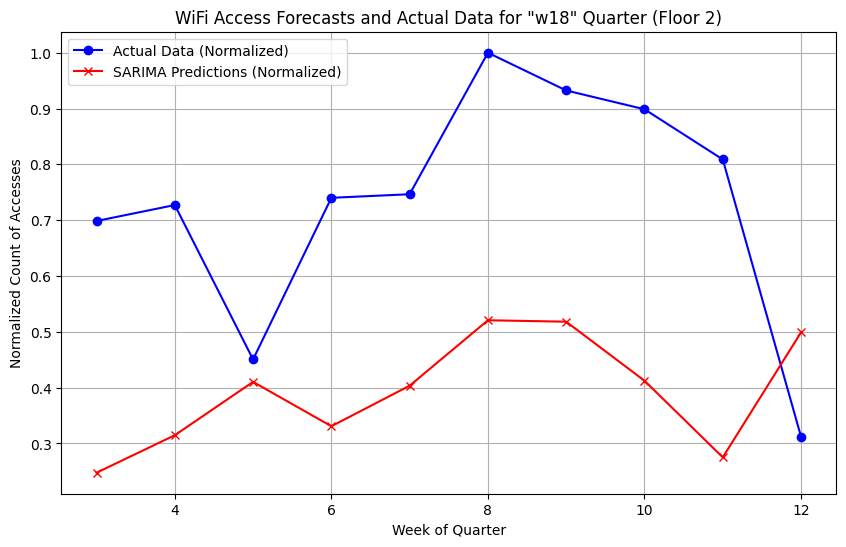

Quarter: s18 || Floor: 2
Mean Absolute Error (MAE) as percentage of mean: 36.69%
36.68508250577326


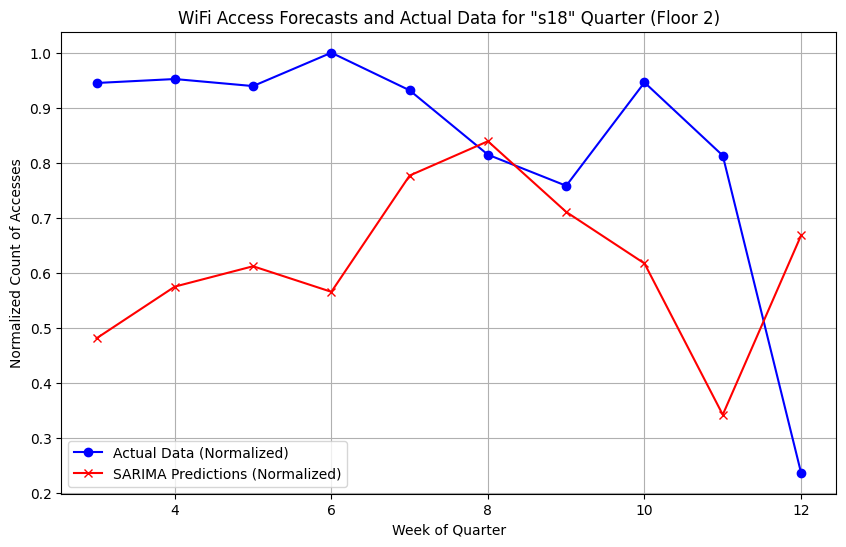

Quarter: f18 || Floor: 2
Mean Absolute Error (MAE) as percentage of mean: 47.43%
47.434432230503155


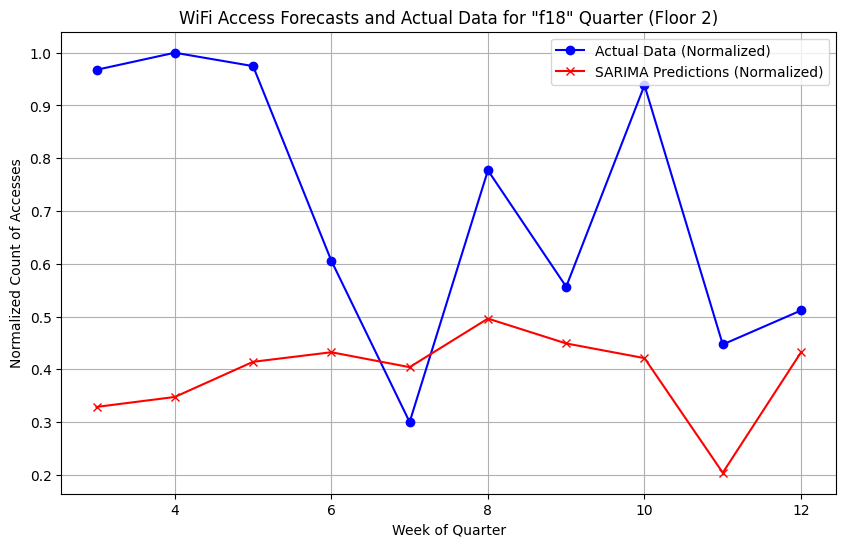

Quarter: w19 || Floor: 2
Mean Absolute Error (MAE) as percentage of mean: 31.35%
31.350908546000806


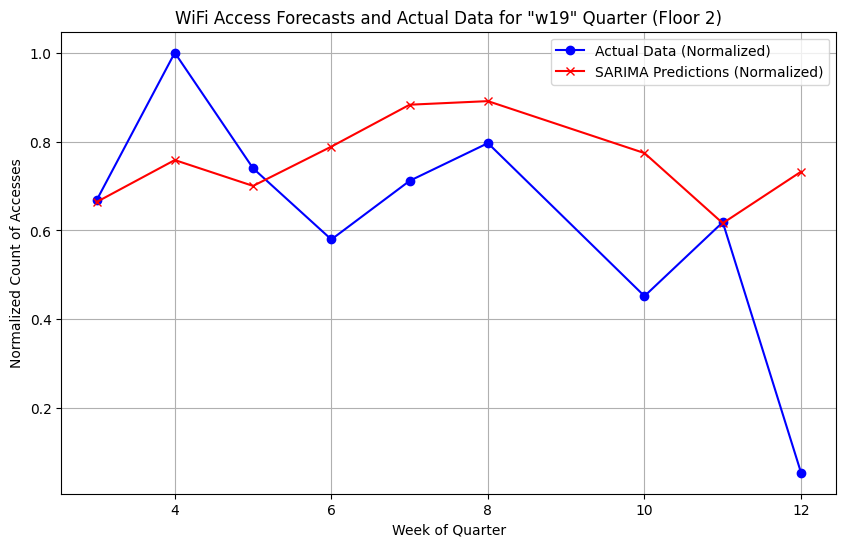

Quarter: f17 || Floor: 3
Mean Absolute Error (MAE) as percentage of mean: 39.01%
39.012736813302084


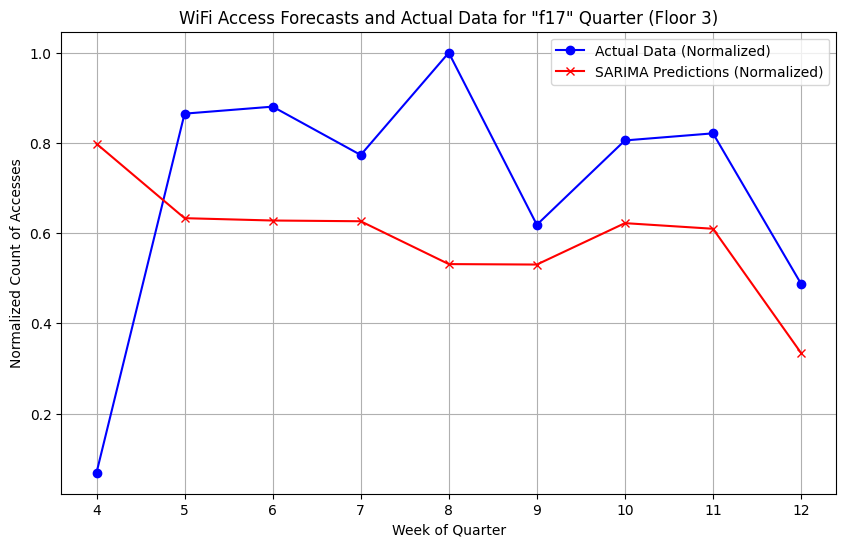

Quarter: w18 || Floor: 3
Mean Absolute Error (MAE) as percentage of mean: 26.42%
26.422061981780136


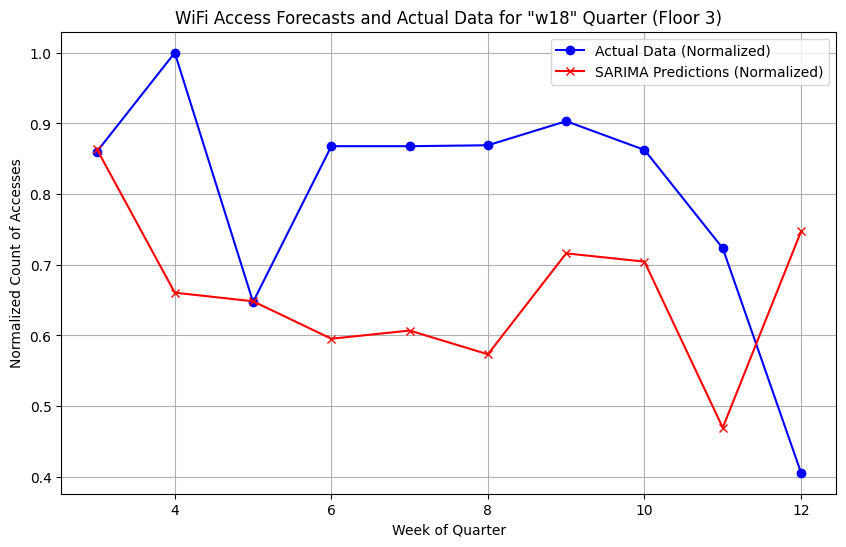

Quarter: s18 || Floor: 3
Mean Absolute Error (MAE) as percentage of mean: 29.28%
29.28463883599489


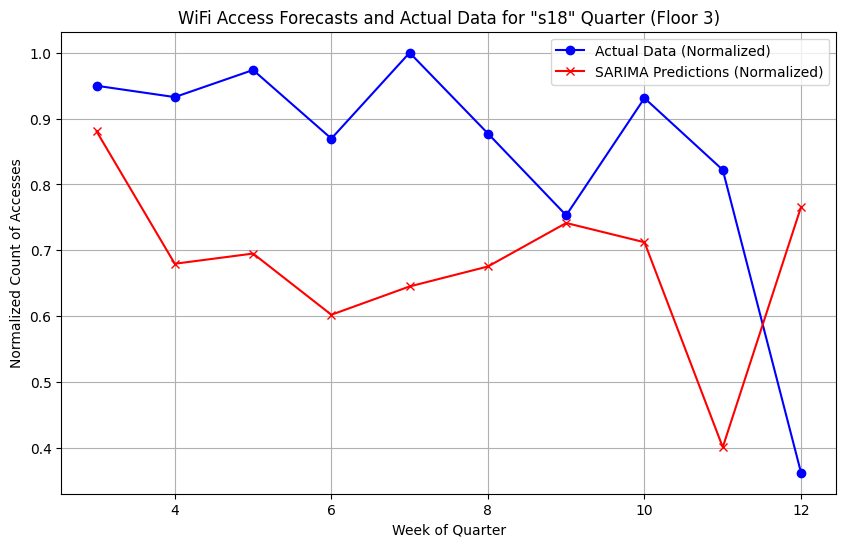

Quarter: f18 || Floor: 3
Mean Absolute Error (MAE) as percentage of mean: 39.59%
39.58694135062272


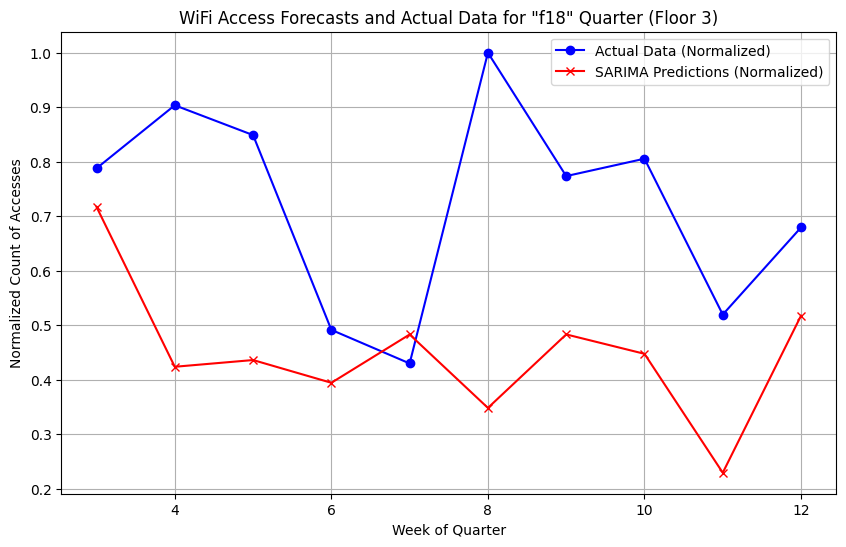

Quarter: w19 || Floor: 3
Mean Absolute Error (MAE) as percentage of mean: 48.57%
48.57217535936987


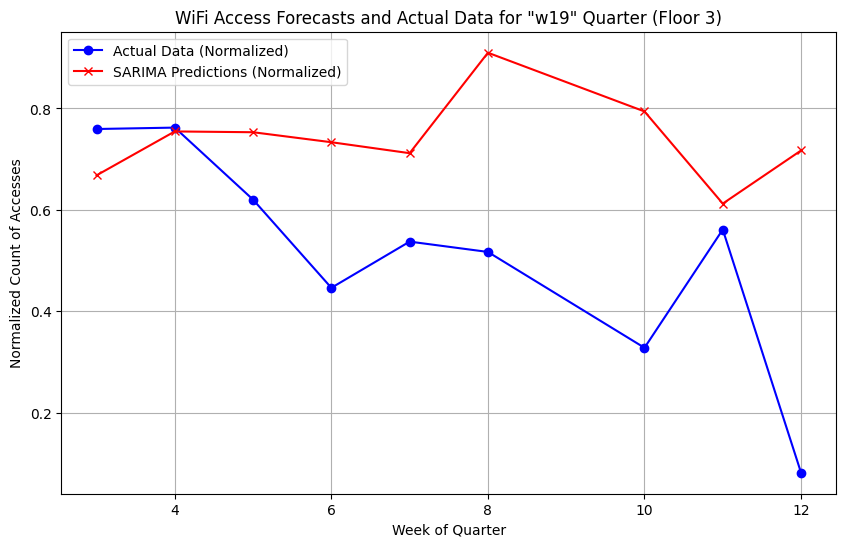

Quarter: f17 || Floor: 4
Mean Absolute Error (MAE) as percentage of mean: 35.23%
35.230609259056564


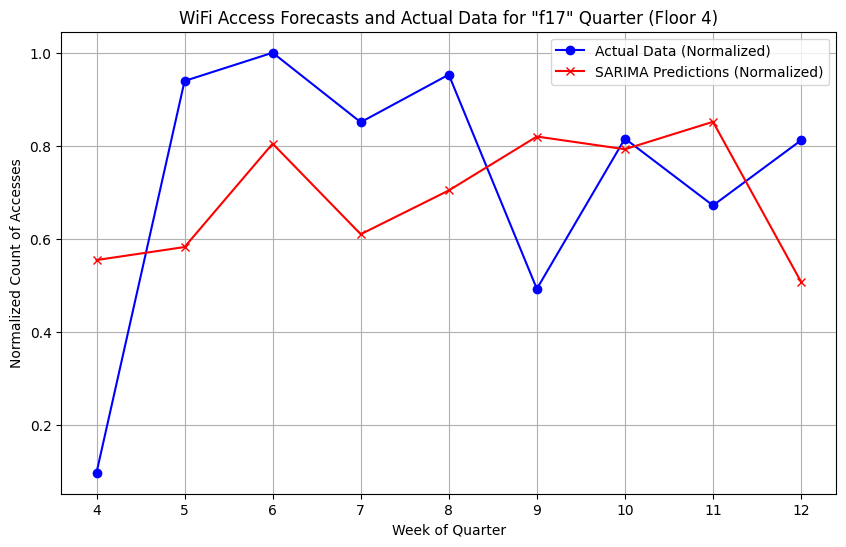

Quarter: w18 || Floor: 4
Mean Absolute Error (MAE) as percentage of mean: 37.12%
37.12080753816354


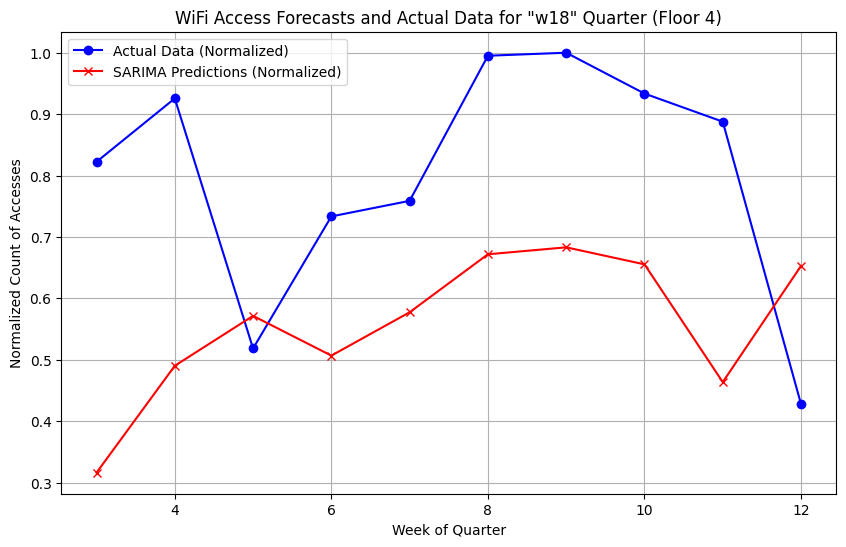

c:\Users\lavin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Quarter: s18 || Floor: 4
Mean Absolute Error (MAE) as percentage of mean: 41.21%
41.20958380027244


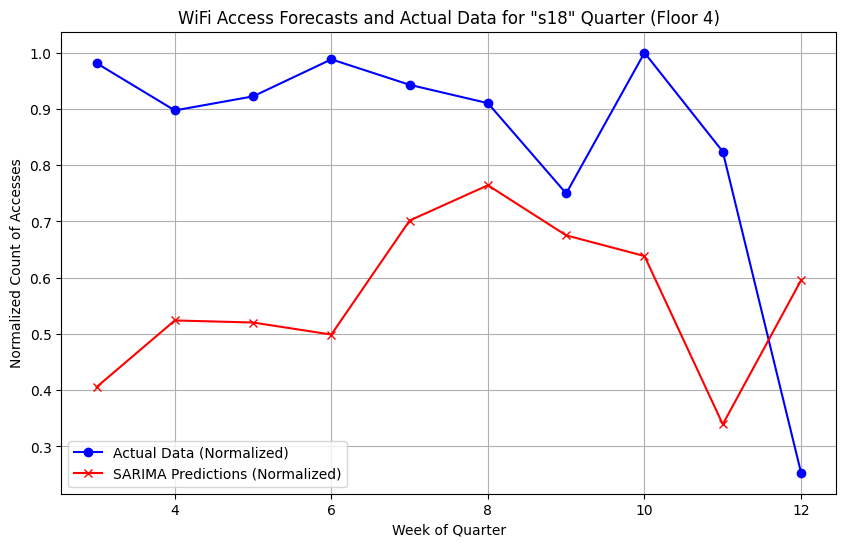

Quarter: f18 || Floor: 4
Mean Absolute Error (MAE) as percentage of mean: 51.54%
51.54104104791137


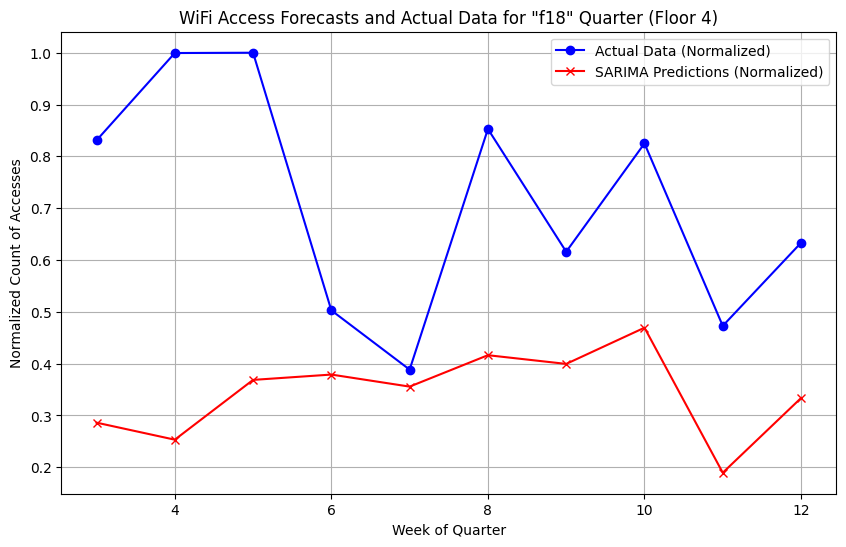

Quarter: w19 || Floor: 4
Mean Absolute Error (MAE) as percentage of mean: 39.22%
39.22347584580406


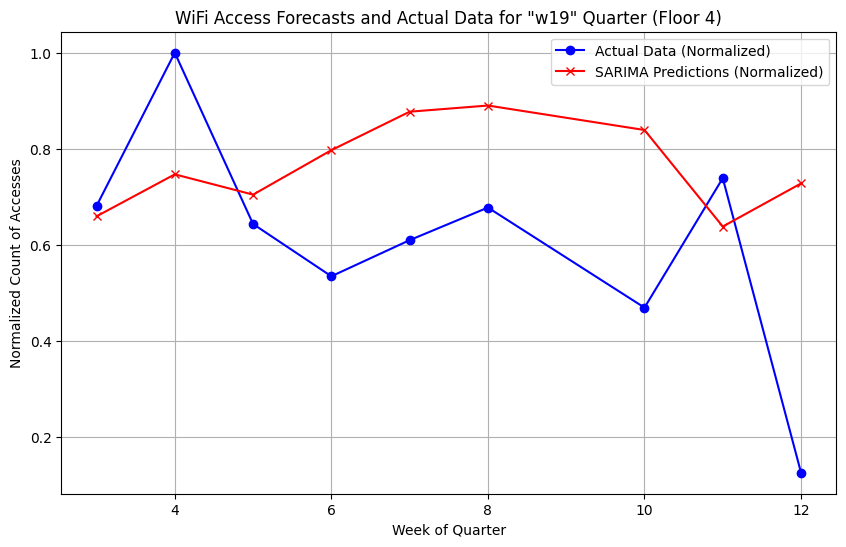

Quarter: f17 || Floor: 5
Mean Absolute Error (MAE) as percentage of mean: 40.25%
40.248513454534205


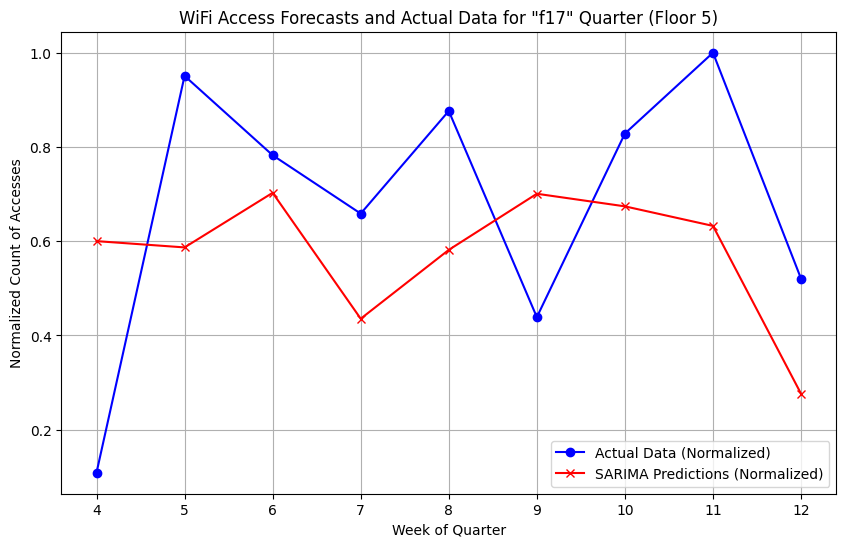

Quarter: w18 || Floor: 5
Mean Absolute Error (MAE) as percentage of mean: 40.55%
40.551627470186155


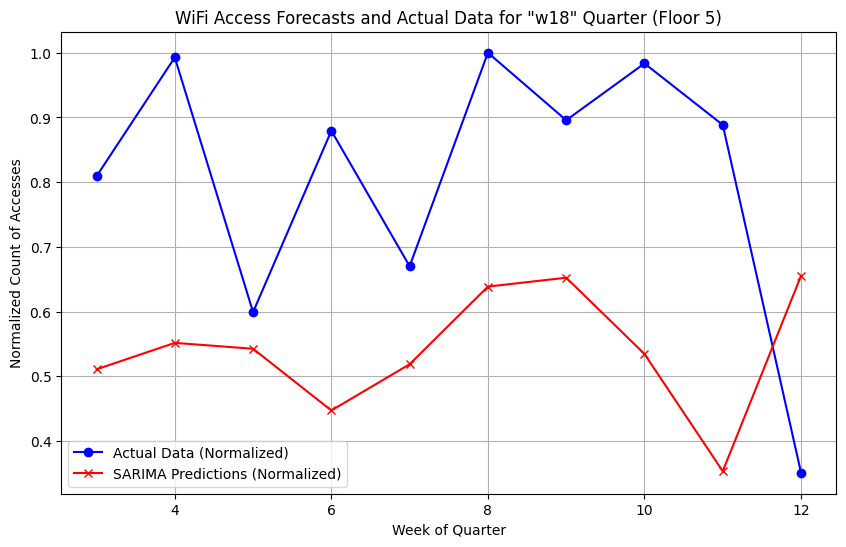

Quarter: s18 || Floor: 5
Mean Absolute Error (MAE) as percentage of mean: 33.98%
33.98300063440514


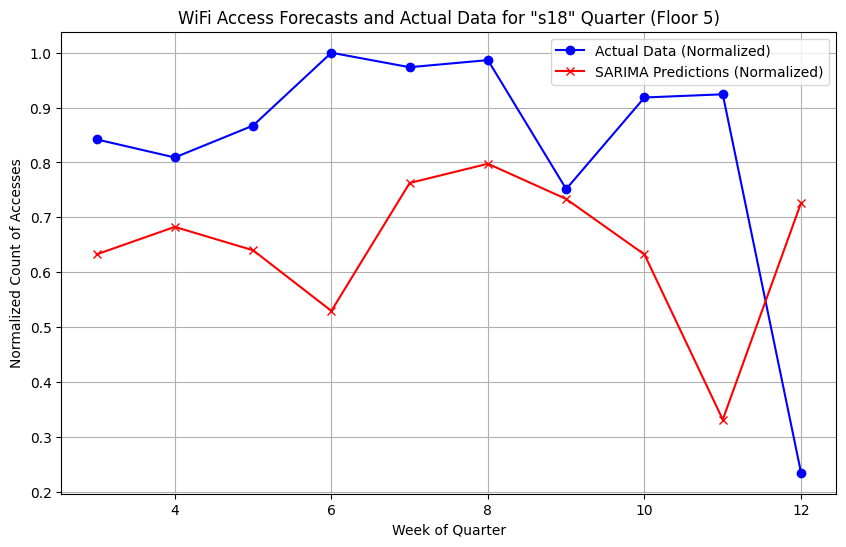

Quarter: f18 || Floor: 5
Mean Absolute Error (MAE) as percentage of mean: 53.05%
53.04958275630587


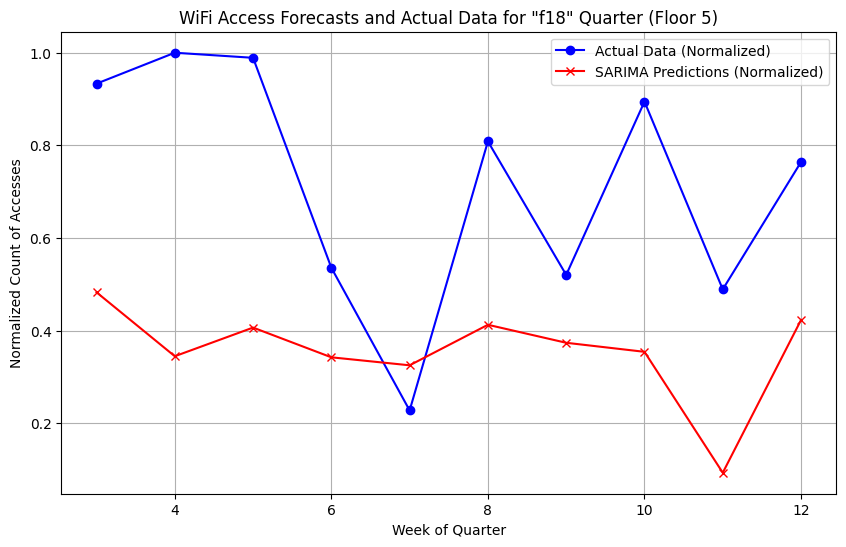

Quarter: w19 || Floor: 5
Mean Absolute Error (MAE) as percentage of mean: 35.49%
35.49307294718172


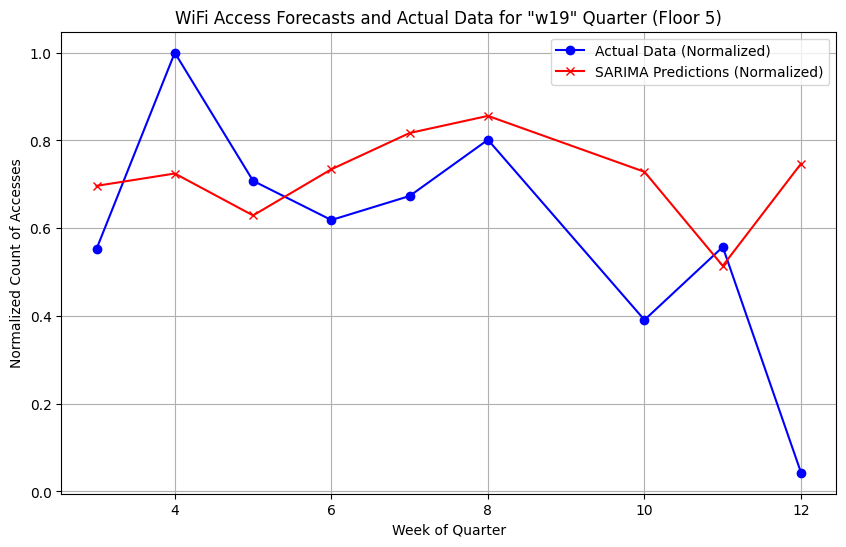

Quarter: f17 || Floor: 6
Mean Absolute Error (MAE) as percentage of mean: 43.62%
43.61690217373489


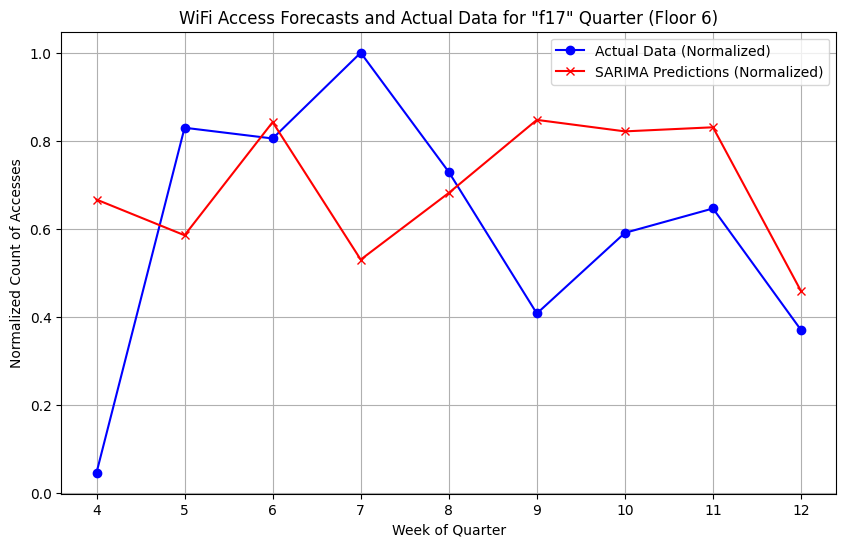

Quarter: w18 || Floor: 6
Mean Absolute Error (MAE) as percentage of mean: 33.28%
33.27522419050885


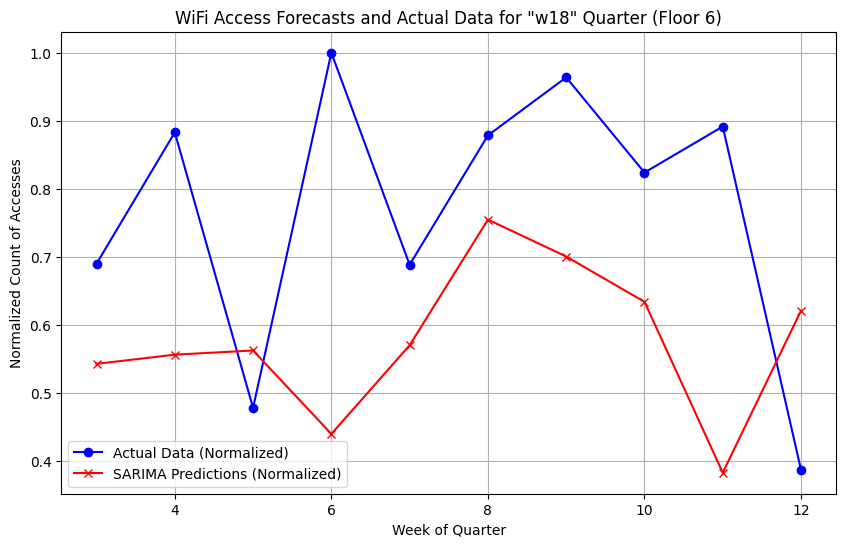

Quarter: s18 || Floor: 6
Mean Absolute Error (MAE) as percentage of mean: 25.57%
25.568846678225803


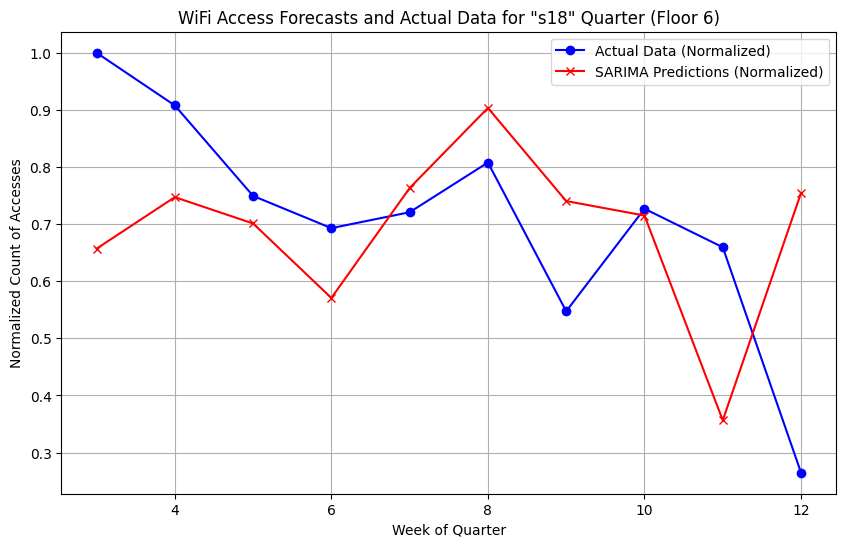

Quarter: f18 || Floor: 6
Mean Absolute Error (MAE) as percentage of mean: 33.09%
33.08835622903926


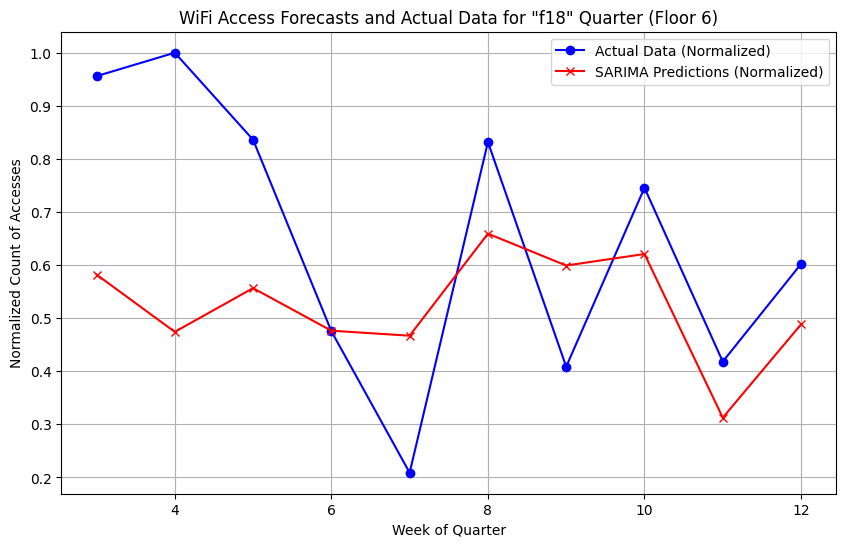

Quarter: w19 || Floor: 6
Mean Absolute Error (MAE) as percentage of mean: 48.65%
48.6465976274665


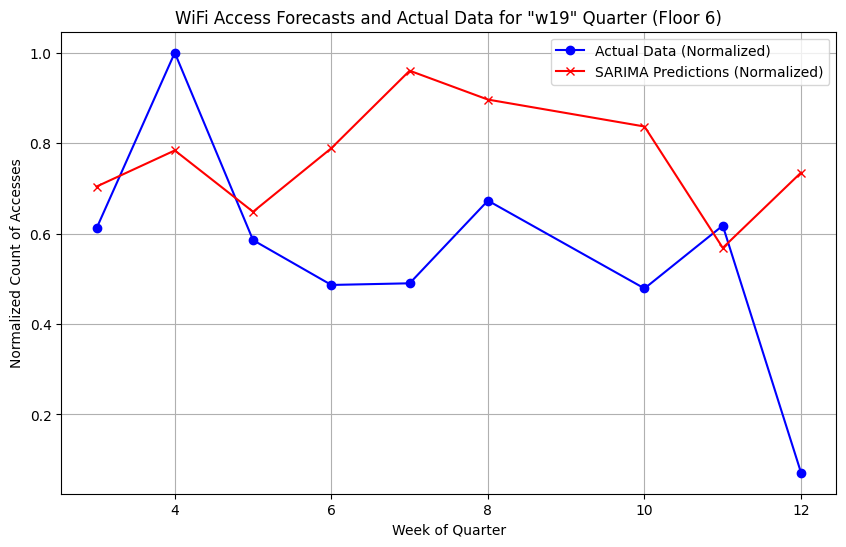

In [39]:



quarters_no_break = ['f17', 'w18', 's18', 'f18', 'w19']
all_quarters = ['f17', 'f17_break', 'f18', 'f18_break', 's18', 's18_break', 's19', 'summer17', 'summer17_break', 'summer18_break', 'w18', 'w18_break', 'w19', 'w19_break']
# s19 has missing data for all floors
# noninvertible s18 floor 3, 5
# w18 hits 0 count from week 13+ for floor 6, why is floor 13+ shown instead of cut?
mae_percentages = []
for floor in [2,3,4,5,6]:
    for quarter in quarters_no_break:
        training_quarters = all_quarters.copy()
        training_quarters.remove(quarter) 
        mae_percentages.append(predict_quarter_processed_4(df_processed_data4, quarter, training_quarters, floor))
        


